# Library / Packages

In [1]:
# basic library
import os
import pandas as pd
import numpy as np
import sys
import hashlib

# graph
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

# complex math
from scipy import stats

# pickle and .env
from dotenv import dotenv_values
import pickle

# Format

In [2]:
def lab_round(x, pos): 
    if abs(x) >= 1e9: 
        return f'{x/1e9} B'
    
    elif abs(x) >= 1e6:
        return f'{x/1e6} M'
    
    elif abs(x) >= 1e3:
        return f'{x/1e3} K'
    
    else:
        return f'{x}'
    
def val_round(x):
    if abs(x) >= 1e9:
        return f'{x/1e9:.2f} B'
    
    elif abs(x) >= 1e6:
        return f'{x/1e6:.2f} M'
    
    elif abs(x) >= 1e3:
        return f'{x/1e3:.2f} K'
    
    else:
        return f'{x:.2f}'

In [3]:
pd.set_option('display.max_columns', None)

# Data Source

In [4]:
# parameter
share = {**dotenv_values('../.env.shared')} 

# read pickle
with open(share['PREPARATION_DATA'], 'rb') as f:
    loaded_data = pickle.load(f)

cc_df = pd.DataFrame(loaded_data)
cc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294588 entries, 0 to 294587
Data columns (total 23 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   credit_card                294588 non-null  int64         
 1   datetime                   294588 non-null  datetime64[ns]
 2   long                       294588 non-null  float64       
 3   lat                        294588 non-null  float64       
 4   zipcode                    294588 non-null  int64         
 5   state                      294588 non-null  object        
 6   city                       294588 non-null  object        
 7   year                       294588 non-null  int32         
 8   quarter                    294588 non-null  object        
 9   month                      294588 non-null  object        
 10  season                     294588 non-null  object        
 11  week_cat                   294588 non-null  object  

In [5]:
cc_df.head()

,credit_card,datetime,long,lat,zipcode,state,city,year,quarter,month,season,week_cat,day,credit_card_limit,limit_cat,transaction_dollar_amount,transaction_count,time_diff_per_seconds,prev_long,prev_lat,distance,geo_cat,fraud_status
0,1003715054175576,2015-09-11 00:32:40,-80.174132,40.267370,15342,pa,houston,2015,2015Q3,september,fall,weekday,friday,20000,medium,43.78,1.0,0.0,0.000000,0.000000,9177.582847,anomaly,fraud
1,1003715054175576,2015-10-24 22:23:08,-80.194240,40.180114,15342,pa,houston,2015,2015Q4,october,fall,weekend,saturday,20000,medium,103.15,1.0,3793828.0,-80.174132,40.267370,9.838861,normal,not_fraud
2,1003715054175576,2015-10-26 18:19:36,-80.211033,40.313004,15342,pa,houston,2015,2015Q4,october,fall,weekday,monday,20000,medium,48.55,1.0,158188.0,-80.194240,40.180114,14.825103,normal,not_fraud
3,1003715054175576,2015-10-22 19:41:10,-80.174138,40.290895,15342,pa,houston,2015,2015Q4,october,fall,weekday,thursday,20000,medium,136.18,1.0,-340706.0,-80.211033,40.313004,3.983158,normal,not_fraud
4,1003715054175576,2015-10-26 20:08:22,-80.238720,40.166719,15342,pa,houston,2015,2015Q4,october,fall,weekday,monday,20000,medium,71.82,1.0,347232.0,-80.174138,40.290895,14.843545,normal,not_fraud


# Data Visualization

## Basic Analyst

### Descriptive Analyst

In [6]:
# filter data for descriptive analyst
#===============================
descriptive_data = cc_df.select_dtypes(include = ['number'])

exclude_col = ['credit_card', 'long', 'lat', 'zipcode', 'year', 'month']
descriptive_data = descriptive_data.drop(columns = exclude_col, errors = 'ignore')

# Deskripsi statistik
#===============================
description = descriptive_data.describe(include = 'all').map(val_round)

mode = descriptive_data.mode().iloc[0].map(val_round)
variance = descriptive_data.var().map(val_round)
range_ = (descriptive_data.max() - descriptive_data.min()).map(val_round)
iqr = stats.iqr(descriptive_data)
coefficient_of_variation = (descriptive_data.std() / descriptive_data.mean()).map(val_round)
skewness = descriptive_data.skew().map(val_round)
kurtosis = descriptive_data.kurtosis().map(val_round)

# add data into description descriptive
#=======================================
description.loc['mode'] = mode
description.loc['variance'] = variance
description.loc['range'] = range_
description.loc['IQR'] = val_round(iqr)
description.loc['Coefficient of Variation'] = coefficient_of_variation
description.loc['Skewness'] = skewness
description.loc['Kurtosis'] = kurtosis

description

,credit_card_limit,transaction_dollar_amount,transaction_count,time_diff_per_seconds,prev_long,prev_lat,distance
count,294.59 K,294.59 K,294.59 K,294.59 K,294.59 K,294.59 K,294.59 K
mean,15.50 K,86.01,1.00,44.81,-75.98,40.80,311.33
std,7.96 K,124.66,0.01,3.19 M,20.59,5.88,1.76 K
min,2.00 K,0.01,1.00,-7.81 M,-179.39,-68.05,0.02
25%,10.00 K,29.97,1.00,-2.26 M,-80.21,40.45,5.06
50%,15.00 K,58.47,1.00,1.00,-73.18,42.39,7.92
75%,20.00 K,100.40,1.00,2.26 M,-72.09,43.18,11.05
max,55.00 K,999.97,2.00,7.81 M,179.92,78.91,19.74 K
mode,20.00 K,24.15,1.00,1.00,0.00,0.00,0.02
variance,63.30 M,15.54 K,0.00,10184.96 B,423.78,34.58,3.10 M


### Data Distribution

In [7]:
rows = cc_df.shape[0]
cols = cc_df.shape[1]

if rows <= 5000 or cols <= 20:
    category = "Small Dataset"

elif rows <= 50000 or cols <= 100:
    category = "Medium Dataset"

elif rows <= 1000000 or cols <= 500:
    category = "Large Dataset"

elif rows <= 10000000 or cols <= 1000:
    category = "Very Large Dataset"

else:
    category = "Massive Dataset"

print(f'Rows: {val_round(rows)}, Columns: {val_round(cols)}, then Dataset Category: {category.upper()}!!!')

Rows: 294.59 K, Columns: 23.00, then Dataset Category: MEDIUM DATASET!!!


#### Numeric Category

##### Menguji Normalitas Data

In [8]:
# Anderson methode
from scipy.stats import anderson

# Pilih kolom numerik
numeric_columns = ['credit_card_limit', 'transaction_dollar_amount']

# Iterasi untuk setiap kolom
for col in numeric_columns:
    # Lakukan uji Anderson-Darling
    result = anderson(cc_df[col], dist='norm')
    
    statistic_result = result.statistic
    critical_values = result.critical_values
    significance_levels = result.significance_level  # Tingkat signifikansi

    # Ambil nilai kritis pada tingkat signifikansi 5%
    critical_value_5_percent = critical_values[2]  # Indeks ke-2 untuk 5%
    print(f"Column: {col} \n")
    print(f"Statistic: {statistic_result}")
    print(f"Critical Value (5%): {critical_value_5_percent} \n")
    
    # Bandingkan nilai statistik dengan nilai kritis
    if statistic_result < critical_value_5_percent:
        print(f"Column {col}: Data berdistribusi normal\n")

    else:
        print(f"Column {col}: Data tidak berdistribusi normal\n")

Column: credit_card_limit 

Statistic: 4928.5428442920675
Critical Value (5%): 0.787 

Column credit_card_limit: Data tidak berdistribusi normal

Column: transaction_dollar_amount 

Statistic: 37362.67249053239
Critical Value (5%): 0.787 

Column transaction_dollar_amount: Data tidak berdistribusi normal



In [9]:
# A'Agostino methode
from scipy.stats import normaltest

# Pilih kolom numerik
numeric_columns = ['credit_card_limit', 'transaction_dollar_amount']

# Iterasi untuk setiap kolom
for col in numeric_columns:
    stat, p = normaltest(cc_df[col])
    print(f"Column: {col}, \nStatistics = {stat:.4f}, p = {p:.4f}")

    if p > 0.05:
        print(f"Column {col}: Data berdistribusi normal\n")
    
    else:
        print(f"Column {col}: Data tidak berdistribusi normal\n")

Column: credit_card_limit, 
Statistics = 44483.4911, p = 0.0000
Column credit_card_limit: Data tidak berdistribusi normal

Column: transaction_dollar_amount, 
Statistics = 300585.0700, p = 0.0000
Column transaction_dollar_amount: Data tidak berdistribusi normal



##### Menguji Homogenitas Varians

In [10]:
from scipy.stats import levene, permutation_test
import numpy as np

# Pilih kolom numerik
numeric_columns = ['credit_card_limit', 'transaction_dollar_amount']

# Iterasi untuk setiap kolom numerik
for col in numeric_columns:
    # Membagi data berdasarkan kategori 'season' (fall dan summer) dan menghapus NaN
    group1 = cc_df[cc_df['season'] == 'fall'][col].dropna().values
    group2 = cc_df[cc_df['season'] == 'summer'][col].dropna().values
    
    # Cek ukuran sampel sebelum melakukan uji statistik
    size1, size2 = len(group1), len(group2)
    print(f"Column: {col}, Ukuran group1 (fall): {size1}, Ukuran group2 (summer): {size2}")

    if size1 > 10 and size2 > 10:  # Jika ukuran sampel cukup besar, gunakan Levene Test
        stat, p = levene(group1, group2)
        print(f"Statistics = {stat:.2f}, p = {p:.4f}")

        if p > 0.05:
            print(f"Column {col}: Varians antar kelompok homogen\n")

        else:
            print(f"Column {col}: Varians antar kelompok tidak homogen\n")

    elif size1 > 5 and size2 > 5:  # Jika sampel lebih kecil, gunakan Permutation Test
        result = permutation_test(
            (group1, group2), 
            statistic=lambda x, y: abs(x.var() - y.var()),  # Uji perbedaan varians
            permutation_type='independent'
        )
        print(f"Permutation Test P-Value: {result.pvalue:.4f}")

        if result.pvalue > 0.05:
            print(f"Column {col}: Varians antar kelompok homogen (Permutation Test)\n")

        else:
            print(f"Column {col}: Varians antar kelompok tidak homogen (Permutation Test)\n")

    else:
        print(f"Column {col}: Ukuran sampel terlalu kecil untuk uji statistik. Coba gabungkan kategori atau kumpulkan lebih banyak data.\n")

Column: credit_card_limit, Ukuran group1 (fall): 191040, Ukuran group2 (summer): 103548
Statistics = 0.35, p = 0.5549
Column credit_card_limit: Varians antar kelompok homogen

Column: transaction_dollar_amount, Ukuran group1 (fall): 191040, Ukuran group2 (summer): 103548
Statistics = 0.09, p = 0.7670
Column transaction_dollar_amount: Varians antar kelompok homogen



##### Menguji Perbandingan Rata-rata

In [11]:
from scipy.stats import mannwhitneyu, permutation_test
import numpy as np

# Pilih kolom numerik
numeric_columns = ['credit_card_limit', 'transaction_dollar_amount']

# Iterasi untuk setiap kolom numerik
for col in numeric_columns:
    # Membagi data berdasarkan kategori 'season' (fall dan summer) dan menghapus NaN
    group1 = cc_df[cc_df['season'] == 'fall'][col].dropna().values
    group2 = cc_df[cc_df['season'] == 'summer'][col].dropna().values
    
    # Cek ukuran sampel sebelum melakukan uji statistik
    size1, size2 = len(group1), len(group2)
    print(f"Column: {col}, Ukuran group1 (fall): {size1}, Ukuran group2 (summer): {size2}")

    if size1 > 10 and size2 > 10:  # Pastikan ukuran sampel cukup besar
        # Lakukan Mann-Whitney U Test
        stat, p = mannwhitneyu(group1, group2, alternative='two-sided')
        print(f"Statistics = {stat:.2f}, p = {p:.4f}")

        if p > 0.05:
            print(f"Column {col}: Tidak ada perbedaan signifikan\n")

        else:
            print(f"Column {col}: Ada perbedaan signifikan\n")

    elif size1 > 5 and size2 > 5:  # Jika sampel kecil, gunakan Permutation Test
        result = permutation_test(
            (group1, group2), 
            statistic=lambda x, y: abs(x.mean() - y.mean()), 
            permutation_type='independent'
        )
        print(f"Permutation Test P-Value: {result.pvalue:.4f}")

        if result.pvalue > 0.05:
            print(f"Column {col}: Tidak ada perbedaan signifikan (Permutation Test)\n")

        else:
            print(f"Column {col}: Ada perbedaan signifikan (Permutation Test)\n")

    else:
        print(f"Column {col}: Ukuran sampel terlalu kecil untuk uji statistik. Coba gabungkan kategori atau kumpulkan lebih banyak data.\n")

Column: credit_card_limit, Ukuran group1 (fall): 191040, Ukuran group2 (summer): 103548
Statistics = 9888297460.00, p = 0.9054
Column credit_card_limit: Tidak ada perbedaan signifikan

Column: transaction_dollar_amount, Ukuran group1 (fall): 191040, Ukuran group2 (summer): 103548
Statistics = 9898598720.50, p = 0.7270
Column transaction_dollar_amount: Tidak ada perbedaan signifikan



### Histogram

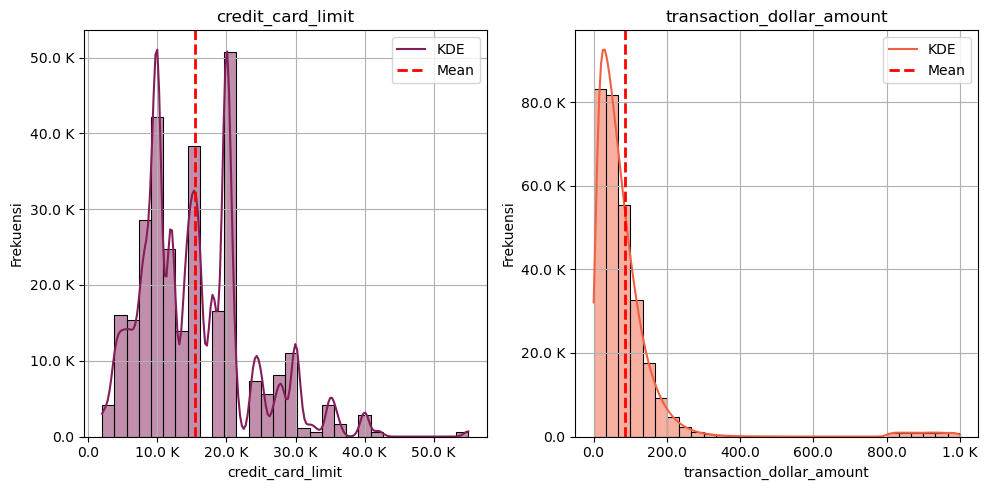

In [12]:
# Data
hist_data = cc_df.select_dtypes(include = ['number'])

exclude_col = ['credit_card', 'long', 'lat', 'zipcode', 'year', 'month', 
               'transaction_count', 'time_diff_per_seconds', 'prev_long', 'prev_lat', 'distance']

hist_data = hist_data.drop(columns = exclude_col, errors = 'ignore')

# Set up subplot grid
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 5))

# Flatten axes for easy iteration
ax = ax.flatten()

# Get number of columns in hist_data
num_cols = len(hist_data.columns)

# Generate colors from a colormap with enough colors for each subplot
colors = sns.color_palette("rocket", num_cols)

# Plot each histogram
for i, column in enumerate(hist_data.columns):
    sns.histplot(hist_data[column], bins = 30, kde = True, color = colors[i], edgecolor = 'black', ax = ax[i])
    ax[i].set_title(column)
    ax[i].set_xlabel(column)
    ax[i].set_ylabel('Frekuensi')

    # Adding vertical line for mean
    ax[i].axvline(x=hist_data[column].mean(), color = 'red', linestyle = '--', linewidth = 2)

    # Add legend
    ax[i].legend(['KDE', 'Mean'], loc = 'upper right')

     # Applying format_number function to the ylabel
    ax[i].xaxis.set_major_formatter(ticker.FuncFormatter(lab_round))
    ax[i].yaxis.set_major_formatter(ticker.FuncFormatter(lab_round))
    ax[i].grid(True)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

### Data Transformation

In [13]:
# log transform
# =====================
cc_df['log_transaction_dollar_amount'] = np.log1p(cc_df['transaction_dollar_amount'])

# square transform
# =====================
cc_df['square_credit_card_limit'] = np.sqrt(cc_df['credit_card_limit'])

# box-cox
# =====================
from scipy.stats import boxcox

# 
cc_df['box_cox_credit_card_limit'], lambda_feature_credit_card_limit = boxcox(cc_df['credit_card_limit'])
print(f"credit_card_limit Box-Cox: {lambda_feature_credit_card_limit}")

# 
cc_df['box_cox_transaction_dollar_amount'], lambda_feature_transaction_dollar_amount = boxcox(cc_df['transaction_dollar_amount'])
print(f"transaction_dollar_amount Box-Cox: {lambda_feature_transaction_dollar_amount}")

credit_card_limit Box-Cox: 0.32260178877438456
transaction_dollar_amount Box-Cox: 0.1423870866722517


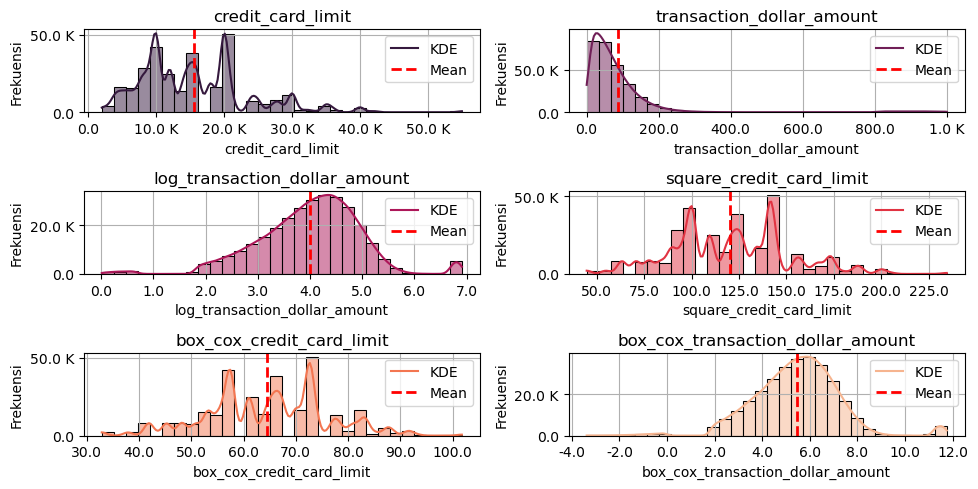

In [14]:
# Data
hist_data = cc_df.select_dtypes(include = ['number'])

exclude_col = ['credit_card', 'long', 'lat', 'zipcode', 'year', 'month', 
               'transaction_count', 'time_diff_per_seconds', 'prev_long', 'prev_lat', 'distance']

hist_data = hist_data.drop(columns = exclude_col, errors = 'ignore')

# Set up subplot grid
fig, ax = plt.subplots(nrows = 3, ncols = 2, figsize = (10, 5))

# Flatten axes for easy iteration
ax = ax.flatten()

# Get number of columns in hist_data
num_cols = len(hist_data.columns)

# Generate colors from a colormap with enough colors for each subplot
colors = sns.color_palette("rocket", num_cols)

# Plot each histogram
for i, column in enumerate(hist_data.columns):
    sns.histplot(hist_data[column], bins = 30, kde = True, color = colors[i], edgecolor = 'black', ax = ax[i])
    ax[i].set_title(column)
    ax[i].set_xlabel(column)
    ax[i].set_ylabel('Frekuensi')

    # Adding vertical line for mean
    ax[i].axvline(x=hist_data[column].mean(), color = 'red', linestyle = '--', linewidth = 2)

    # Add legend
    ax[i].legend(['KDE', 'Mean'], loc = 'upper right')

     # Applying format_number function to the ylabel
    ax[i].xaxis.set_major_formatter(ticker.FuncFormatter(lab_round))
    ax[i].yaxis.set_major_formatter(ticker.FuncFormatter(lab_round))
    ax[i].grid(True)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

### Outlier Check

#### Z-Score Methode
A normal distribution is shown below and it is estimated that 68% of the data points lie between +/- 1 standard deviation. 95% of the data points lie between +/- 2 standard deviation 99.7% of the data points lie between +/- 3 standard deviation

In [15]:
cc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294588 entries, 0 to 294587
Data columns (total 27 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   credit_card                        294588 non-null  int64         
 1   datetime                           294588 non-null  datetime64[ns]
 2   long                               294588 non-null  float64       
 3   lat                                294588 non-null  float64       
 4   zipcode                            294588 non-null  int64         
 5   state                              294588 non-null  object        
 6   city                               294588 non-null  object        
 7   year                               294588 non-null  int32         
 8   quarter                            294588 non-null  object        
 9   month                              294588 non-null  object        
 10  season              

In [16]:
# Data
sample_columns = cc_df.select_dtypes(include = ['number'])

exclude_col = ['credit_card', 'long', 'lat', 'zipcode', 'year', 'month', 
               'transaction_count', 'time_diff_per_seconds', 'prev_long', 'prev_lat', 'distance', 
               'credit_card_limit', 'transaction_dollar_amount', 
               'square_credit_card_limit', 'box_cox_transaction_dollar_amount']

sample_columns = sample_columns.drop(columns = exclude_col, errors = 'ignore').columns 

sample_data = cc_df[sample_columns]

# Set a threshold
threshold = 2

# Loop untuk memeriksa setiap kolom satu persatu
for col in sample_columns:
    # Data kolom
    col_data = sample_data[col]

    # Calculate Z-Score untuk kolom ini
    z_scores = (col_data - col_data.mean()) / col_data.std()

    # Filter out outliers
    outliers = col_data[np.abs(z_scores) >= threshold]
    non_outliers = col_data[np.abs(z_scores) < threshold]

    # Menampilkan hasil secara terstruktur untuk setiap kolom
    print(f"--- {col} ---")
    print('=' * 40)
    print(f"Z-Score Summary:")
    print(f"\tMean: {z_scores.mean()}")
    print(f"\tStandard Deviation: {z_scores.std()} \n")
    print(f"Outliers Threshold: {threshold}")
    
    # Menampilkan jumlah outliers dan non-outliers
    print(f"Outliers: {len(outliers)}")
    print(f"Non-Outliers: {len(non_outliers)} \n")
    
    # Tampilkan beberapa outliers dan non-outliers
    print("Sample of Outliers:")
    print(f"{outliers.head()} \n")  # Tampilkan beberapa outliers

    print("Sample of Non-Outliers:")
    print(f"{non_outliers.head()} \n")  # Tampilkan beberapa non-outliers
    print('=' * 40)
    print("\n")  # Spasi antar kolom

# Hasil akhir
print(f"Completed processing for all columns.")

--- log_transaction_dollar_amount ---
Z-Score Summary:
	Mean: 8.656142714896219e-16
	Standard Deviation: 1.000000000000034 

Outliers Threshold: 2
Outliers: 13187
Non-Outliers: 281401 

Sample of Outliers:
26     0.631272
71     2.056685
84     6.904099
145    6.708658
152    6.790142
Name: log_transaction_dollar_amount, dtype: float64 

Sample of Non-Outliers:
0    3.801762
1    4.645832
2    3.902982
3    4.921294
4    4.287991
Name: log_transaction_dollar_amount, dtype: float64 



--- box_cox_credit_card_limit ---
Z-Score Summary:
	Mean: -1.3929713388059699e-15
	Standard Deviation: 0.9999999999988065 

Outliers Threshold: 2
Outliers: 9959
Non-Outliers: 284629 

Sample of Outliers:
1187    37.926164
1188    37.926164
1189    37.926164
1190    37.926164
1191    37.926164
Name: box_cox_credit_card_limit, dtype: float64 

Sample of Non-Outliers:
0    72.557914
1    72.557914
2    72.557914
3    72.557914
4    72.557914
Name: box_cox_credit_card_limit, dtype: float64 



Completed proce

#### IQR Methode

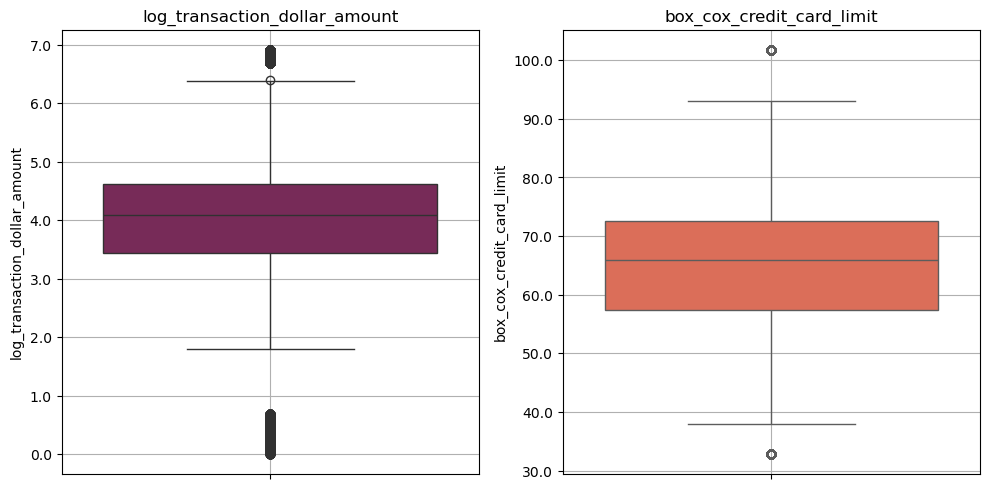

In [17]:
# Data
box_data = cc_df.select_dtypes(include = ['number'])

exclude_col = ['credit_card', 'long', 'lat', 'zipcode', 'year', 'month', 
               'transaction_count', 'time_diff_per_seconds', 'prev_long', 'prev_lat', 'distance', 
               'credit_card_limit', 'transaction_dollar_amount', 
               'square_credit_card_limit', 'box_cox_transaction_dollar_amount']

box_data = box_data.drop(columns = exclude_col, errors = 'ignore')

# Set up subplot grid
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 5))

# Flatten axes for easy iteration
ax = ax.flatten()

# Get number of columns in hist_data
num_cols = len(box_data.columns)

# Generate colors from a colormap with enough colors for each subplot
colors = sns.color_palette("rocket", num_cols)

# Create boxplots for each column
for i, col in enumerate(box_data.columns):
    sns.boxplot(y = col, data = box_data, ax = ax[i], color = colors[i])
    ax[i].yaxis.set_major_formatter(ticker.FuncFormatter(lab_round))
    ax[i].set_title(col)
    ax[i].grid(axis = 'both')

#
plt.tight_layout()

# Show plot
plt.show()

In [18]:
# DataFrame columns to check for outliers
columns_to_check = ['box_cox_credit_card_limit', 'log_transaction_dollar_amount']

# Function to calculate IQR and filter outliers
def filter_outliers(df, columns):
    while True:
        outlier_indices = set()
        
        for col in columns:
            Q1 = np.percentile(df[col], 25, method = 'midpoint')
            Q3 = np.percentile(df[col], 75, method = 'midpoint')
            IQR = Q3 - Q1
            
            upper_bound = Q3 + 1.5 * IQR
            lower_bound = Q1 - 1.5 * IQR
            
            col_outliers = df[(df[col] >= upper_bound) | (df[col] <= lower_bound)].index
            outlier_indices.update(col_outliers)
        
        # If no outliers are found, break the loop
        if not outlier_indices:
            break
        
        # Remove outliers
        df.drop(index=outlier_indices, inplace=True)
    
    return df

# Apply the function
cc_df_cleaned = filter_outliers(cc_df.copy(), columns_to_check)

# Display the old and new shape of the DataFrame
print(f'Old Shape: {cc_df.shape}')
print(f'New Shape: {cc_df_cleaned.shape}')

Old Shape: (294588, 27)
New Shape: (283712, 27)


In [19]:
# clean data
cc_df = cc_df_cleaned.copy()

#### Re-Checking

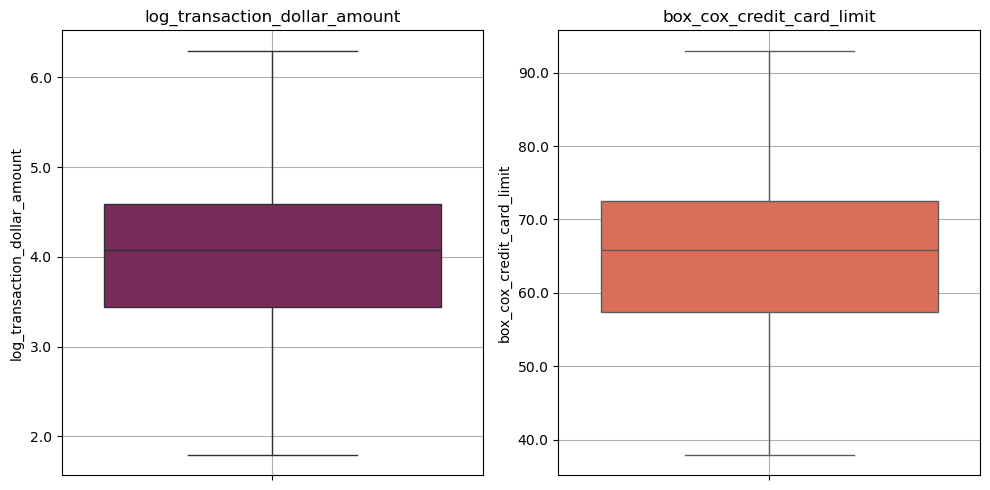

In [20]:
# Data
box_data = cc_df_cleaned.select_dtypes(include = ['number'])

exclude_col = ['credit_card', 'long', 'lat', 'zipcode', 'year', 'month', 
               'transaction_count', 'time_diff_per_seconds', 'prev_long', 'prev_lat', 'distance', 
               'credit_card_limit', 'transaction_dollar_amount', 
               'square_credit_card_limit', 'box_cox_transaction_dollar_amount']

box_data = box_data.drop(columns = exclude_col, errors = 'ignore')

# Set up subplot grid
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 5))

# Flatten axes for easy iteration
ax = ax.flatten()

# Get number of columns in hist_data
num_cols = len(box_data.columns)

# Generate colors from a colormap with enough colors for each subplot
colors = sns.color_palette("rocket", num_cols)

# Create boxplots for each column
for i, col in enumerate(box_data.columns):
    sns.boxplot(y = col, data = box_data, ax = ax[i], color = colors[i])
    ax[i].yaxis.set_major_formatter(ticker.FuncFormatter(lab_round))
    ax[i].set_title(col)
    ax[i].grid(axis = 'both')

#
plt.tight_layout()

# Show plot
plt.show()

In [21]:
# drop unnecessary column
drop_col = ['log_transaction_dollar_amount', 'square_credit_card_limit', 
            'box_cox_credit_card_limit', 'box_cox_transaction_dollar_amount']

cc_df = cc_df.drop(drop_col, axis = 1)

### Check Imbalanced Data

#### Proportion

In [22]:
# Check proportion
print(f'{cc_df["fraud_status"].value_counts()} \n')
print(round(cc_df["fraud_status"].value_counts(normalize = True) * 100, 2))

fraud_status
not_fraud    278736
fraud          4976
Name: count, dtype: int64 

fraud_status
not_fraud    98.25
fraud         1.75
Name: proportion, dtype: float64


#### Imbalance Ratio

In [23]:
# 
minority_class = cc_df["fraud_status"].value_counts().min()
majority_class = cc_df["fraud_status"].value_counts().max()

# 
imbalance_ratio = majority_class / minority_class
print(f"Imbalance Ratio (IR): {imbalance_ratio:.2f}")

Imbalance Ratio (IR): 56.02


## Basic Visualization

In [24]:
cc_df.head()

,credit_card,datetime,long,lat,zipcode,state,city,year,quarter,month,season,week_cat,day,credit_card_limit,limit_cat,transaction_dollar_amount,transaction_count,time_diff_per_seconds,prev_long,prev_lat,distance,geo_cat,fraud_status
0,1003715054175576,2015-09-11 00:32:40,-80.174132,40.267370,15342,pa,houston,2015,2015Q3,september,fall,weekday,friday,20000,medium,43.78,1.0,0.0,0.000000,0.000000,9177.582847,anomaly,fraud
1,1003715054175576,2015-10-24 22:23:08,-80.194240,40.180114,15342,pa,houston,2015,2015Q4,october,fall,weekend,saturday,20000,medium,103.15,1.0,3793828.0,-80.174132,40.267370,9.838861,normal,not_fraud
2,1003715054175576,2015-10-26 18:19:36,-80.211033,40.313004,15342,pa,houston,2015,2015Q4,october,fall,weekday,monday,20000,medium,48.55,1.0,158188.0,-80.194240,40.180114,14.825103,normal,not_fraud
3,1003715054175576,2015-10-22 19:41:10,-80.174138,40.290895,15342,pa,houston,2015,2015Q4,october,fall,weekday,thursday,20000,medium,136.18,1.0,-340706.0,-80.211033,40.313004,3.983158,normal,not_fraud
4,1003715054175576,2015-10-26 20:08:22,-80.238720,40.166719,15342,pa,houston,2015,2015Q4,october,fall,weekday,monday,20000,medium,71.82,1.0,347232.0,-80.174138,40.290895,14.843545,normal,not_fraud


### Heatmap

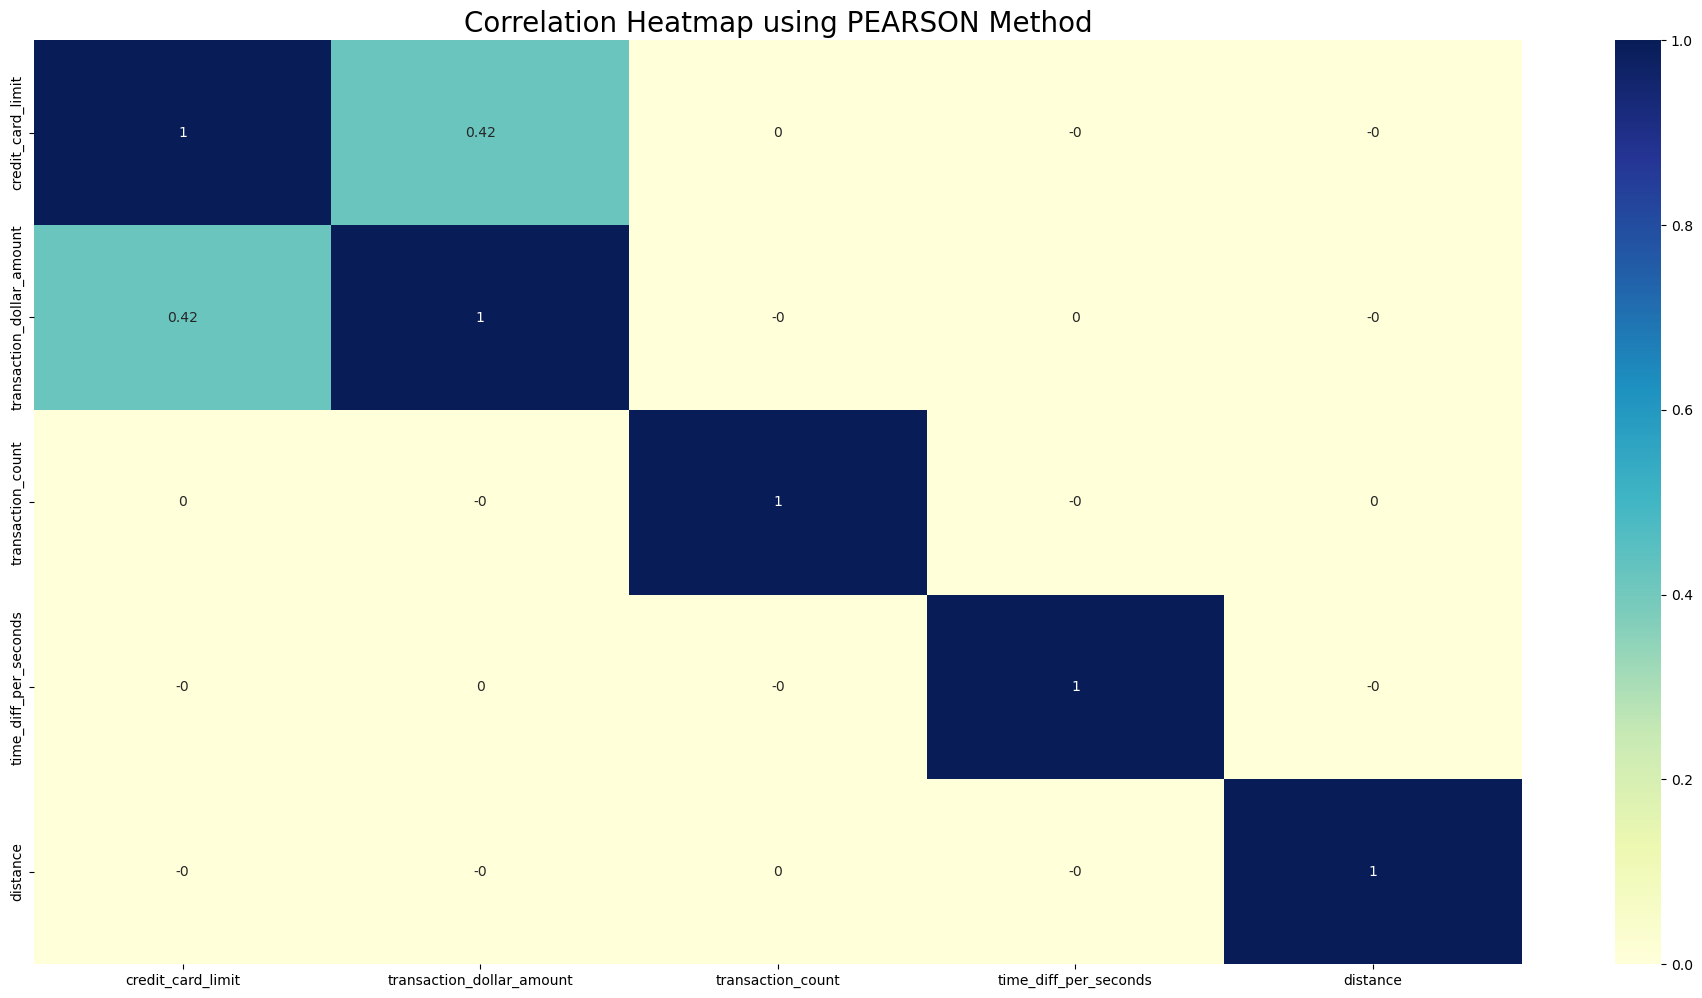

VIF PEARSON Method :
                     Feature   VIF
0          credit_card_limit  6.14
1  transaction_dollar_amount  3.30
2          transaction_count  5.35
3      time_diff_per_seconds  1.00
4                   distance  1.03 



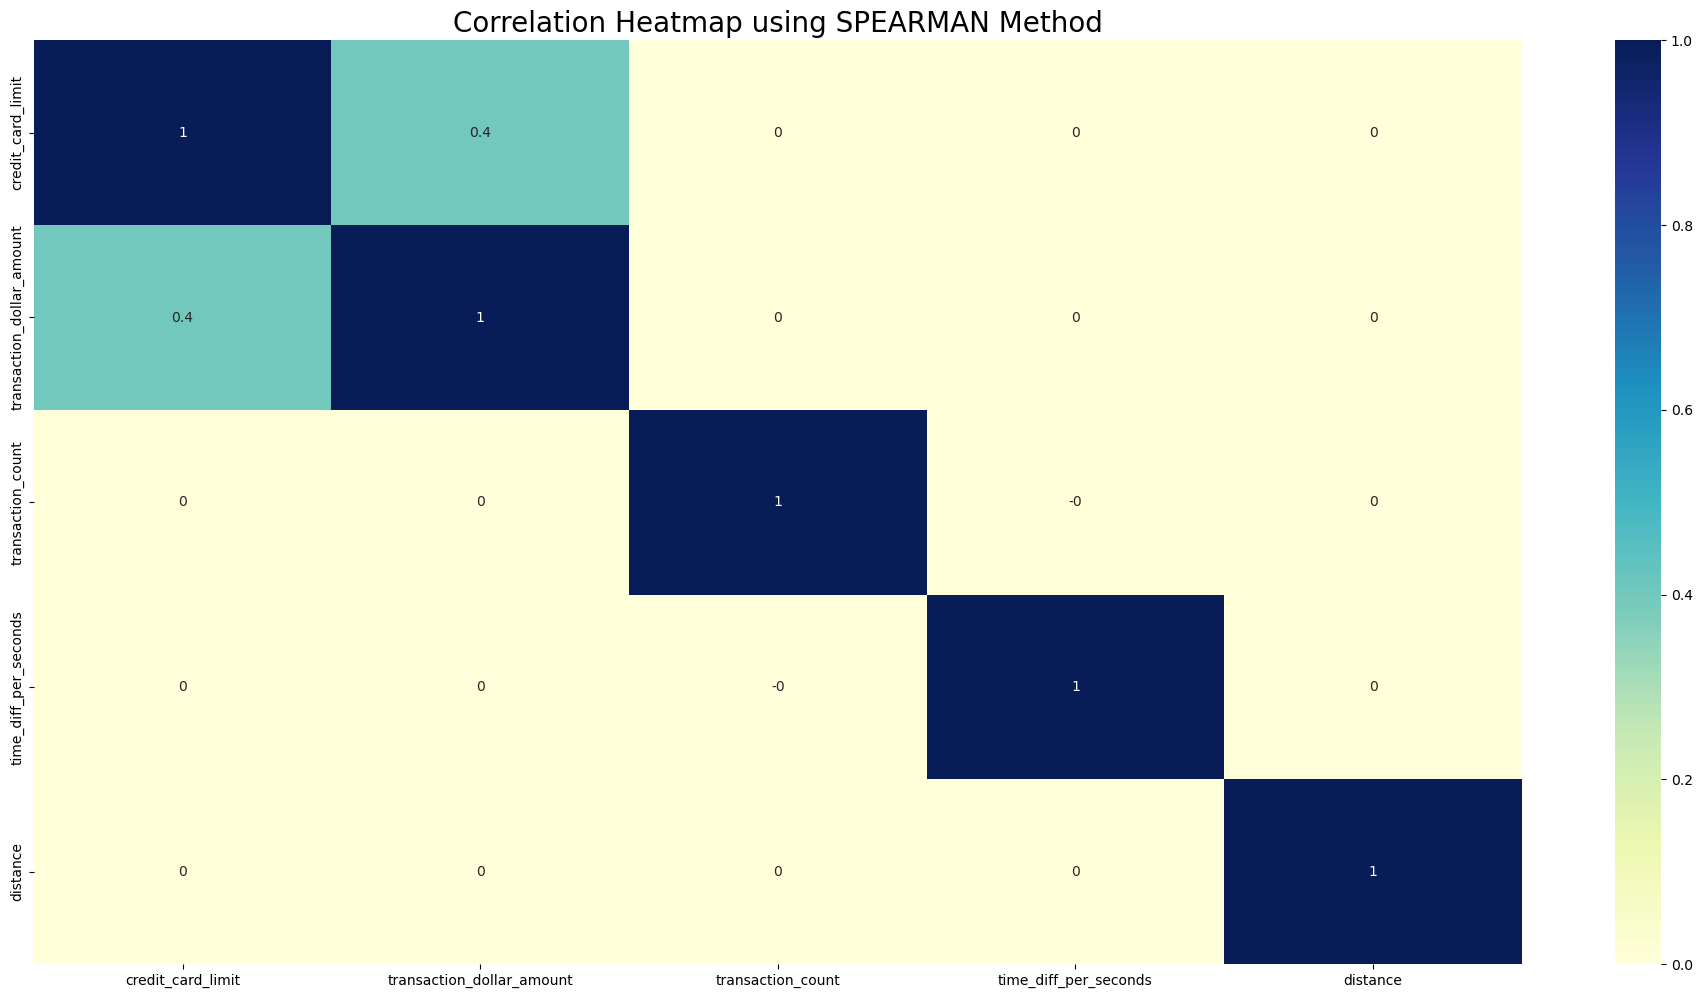

VIF SPEARMAN Method :
                     Feature   VIF
0          credit_card_limit  6.14
1  transaction_dollar_amount  3.30
2          transaction_count  5.35
3      time_diff_per_seconds  1.00
4                   distance  1.03 



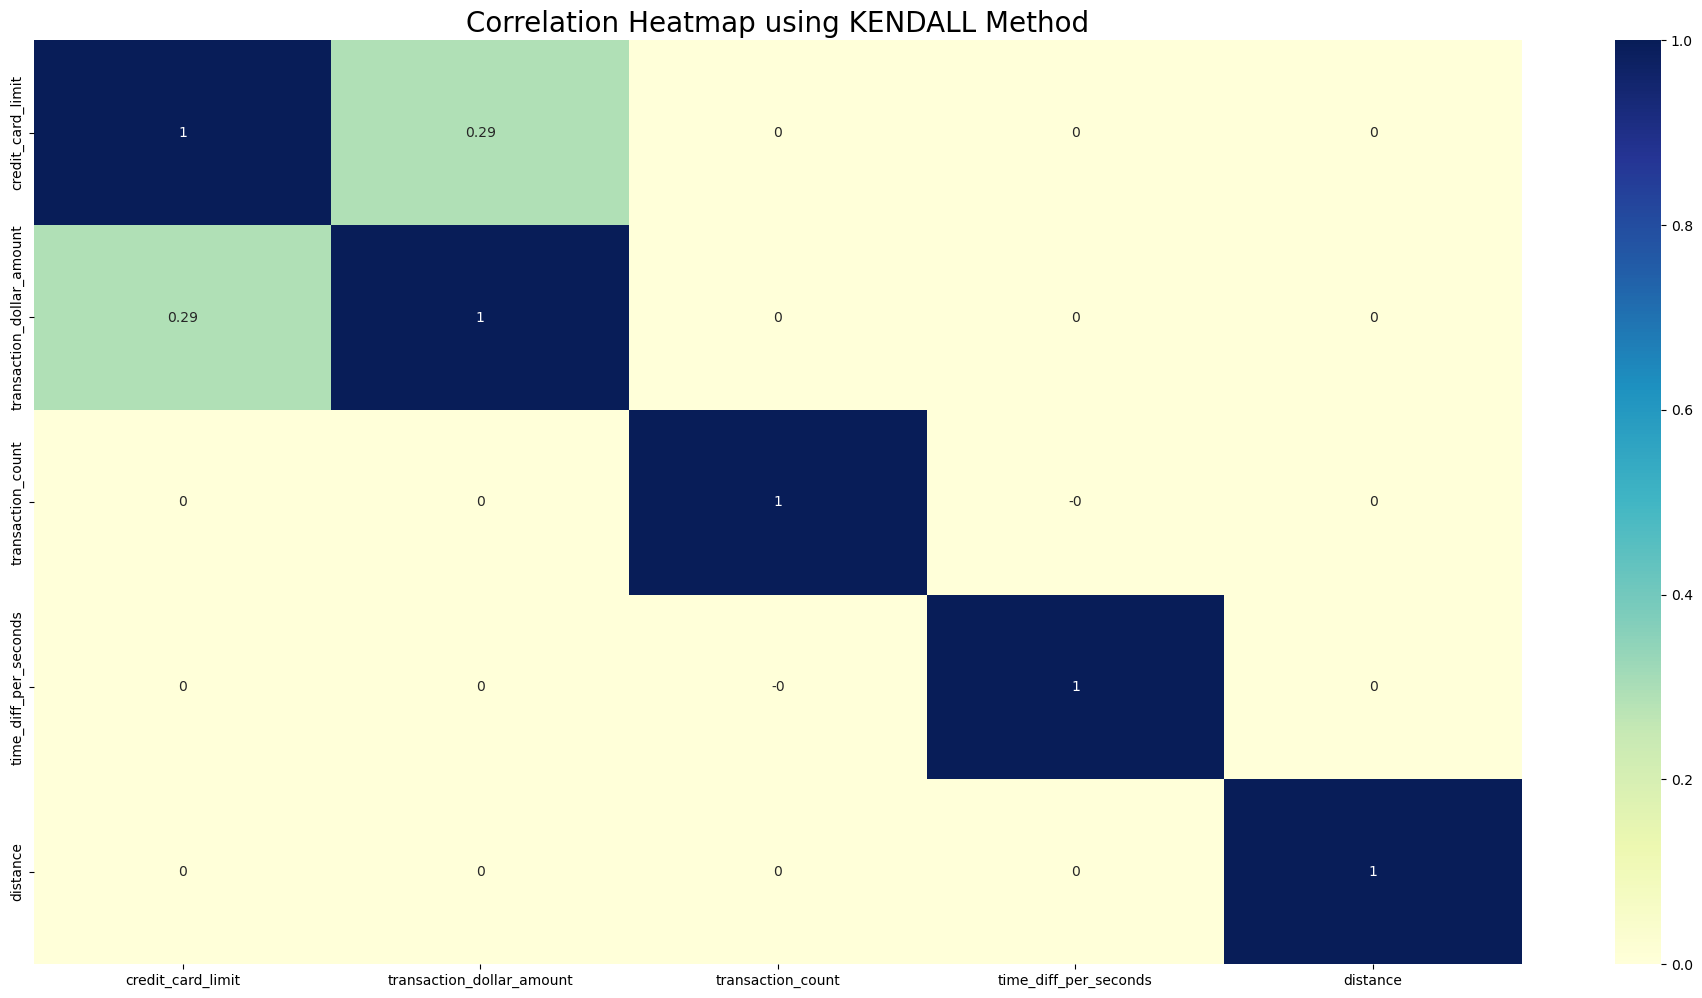

VIF KENDALL Method :
                     Feature   VIF
0          credit_card_limit  6.14
1  transaction_dollar_amount  3.30
2          transaction_count  5.35
3      time_diff_per_seconds  1.00
4                   distance  1.03 



In [25]:
# Date & Numeric Correlations
correlations_data = cc_df.select_dtypes(include = 'number')

exclude_col = ['credit_card', 'long', 'lat', 'zipcode', 'year', 
               'prev_long', 'prev_lat']

correlations_data = correlations_data.drop(columns = exclude_col)

# List of correlation methods to be used
sample_methods = ['pearson', 'spearman', 'kendall']

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_features = correlations_data.columns

# Plotting correlation heatmap for each method
for method in sample_methods:
    # Creat canvas
    plt.figure(figsize = (24, 12))  # Set the figure size for each heatmap
    plt.title(f'Correlation Heatmap using {method.upper()} Method', fontsize = 20)

    # Calculate correlation for the current method
    corr_matrix = correlations_data.corr(method = method).round(2)

    # Plot heatmap
    sns.heatmap(corr_matrix, cmap = "YlGnBu", annot = True)
    plt.show()

    # Variance Inflation Factor (VIF)
    X = correlations_data[vif_features]
    vif_data = pd.DataFrame()
    vif_data["Feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    print(f"VIF {method.upper()} Method :\n{round(vif_data, 2)} \n")

### Uni-variate Analyst

In [26]:
cat_df = cc_df.select_dtypes(include = 'object')
cat_df.head()

,state,city,quarter,month,season,week_cat,day,limit_cat,geo_cat,fraud_status
0,pa,houston,2015Q3,september,fall,weekday,friday,medium,anomaly,fraud
1,pa,houston,2015Q4,october,fall,weekend,saturday,medium,normal,not_fraud
2,pa,houston,2015Q4,october,fall,weekday,monday,medium,normal,not_fraud
3,pa,houston,2015Q4,october,fall,weekday,thursday,medium,normal,not_fraud
4,pa,houston,2015Q4,october,fall,weekday,monday,medium,normal,not_fraud


In [27]:
for i in cat_df.columns:
    print(f'{i.upper()} \t: {cat_df[i].unique()} \n')
    print(f'{"-" * 50} \n')

STATE 	: ['pa' 'nh' 'vt' 'wa' 'ny' 'il' 'ga' 'ma' 'wv' 'fl' 'ri' 'nj' 'ia' 'ks'
 'ok' 'oh' 'me' 'mo' 'nm' 'va' 'ca' 'pr' 'tx' 'mi' 'in' 'co' 'al' 'nc'
 'md' 'hi' 'ct' 'id' 'la' 'az' 'ut'] 

-------------------------------------------------- 

CITY 	: ['houston' 'washington' 'charlotte' 'dallas' 'seattle' 'buffalo'
 'new york' 'el paso' 'louisville' 'richmond' 'miami' 'tampa' 'arlington'
 'oakland' 'columbus' 'cedar rapids' 'atlanta' 'memphis' 'wichita'
 'clinton' 'pittsburgh' 'oklahoma city' 'cincinnati' 'auburn' 'charleston'
 'kansas city' 'springfield' 'jackson' 'sacramento' 'rochester'
 'las vegas' 'madison' 'austin' 'saint paul' 'boston' 'roanoke' 'portland'
 'somerset' 'quitman' 'san francisco' 'san antonio' 'lexington'
 'los angeles' 'newport' 'tulsa' 'san diego' 'saint louis' 'albany'
 'lafayette' 'knoxville' 'tacoma' 'friendship' 'indianapolis' 'newark'
 'amarillo' 'birmingham' 'dayton' 'alexandria' 'colorado springs' 'akron'
 'fresno' 'pensacola' 'detroit' 'jacksonville' 'hart

#### State

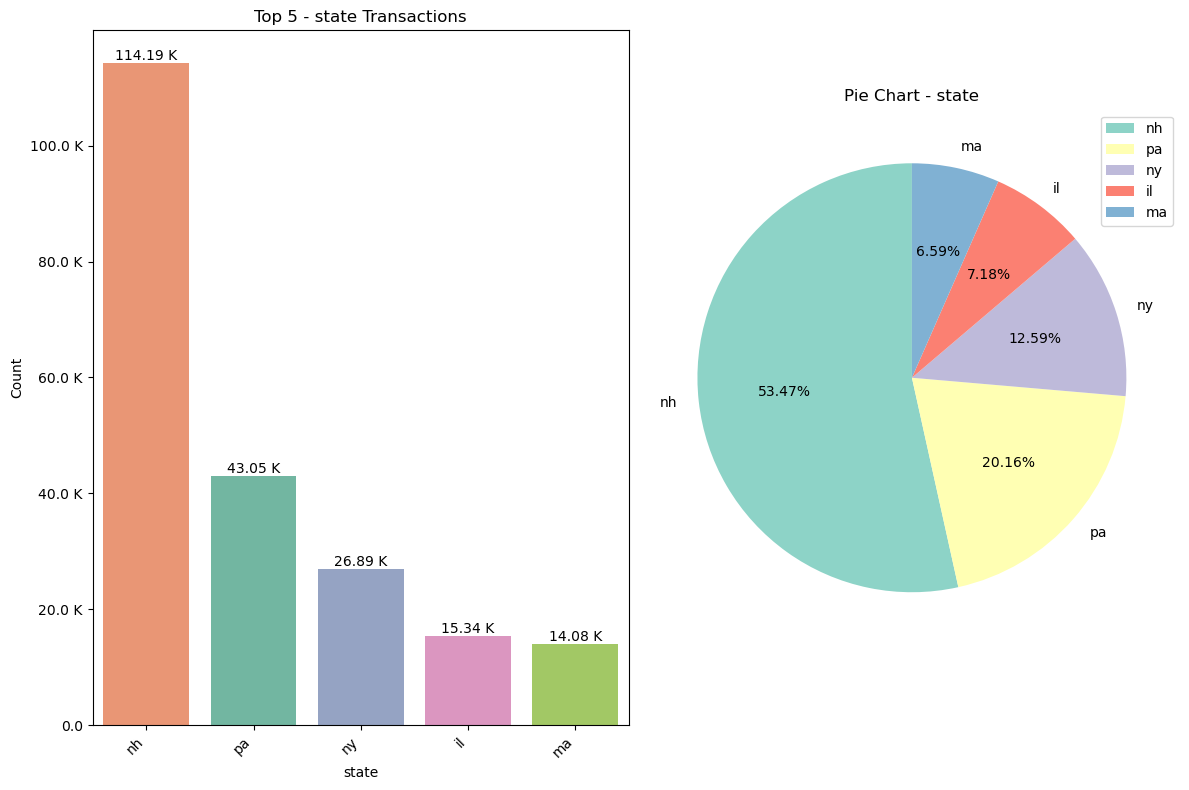

In [28]:
# Specific column
var = 'state'

# Mengambil 10 kategori teratas berdasarkan jumlah kemunculannya
top_categories = cc_df[var].value_counts().index[:5]

# Canvas
plt.figure(figsize = (12, 8))

# Count Plot dengan membatasi kategori yang ditampilkan
ax1 = plt.subplot(1, 2, 1)

# Filter data untuk menampilkan hanya kategori teratas atau "Others"
filtered_df = cc_df[cc_df[var].isin(top_categories)]

# Count Plot dengan filtered data
sns.countplot(x = var, data = filtered_df, ax = ax1, hue = var, palette = 'Set2', order = top_categories)

# Menambahkan judul dan label
ax1.set_title(f'Top 5 - {var} Transactions', fontsize = 12)
ax1.set_xlabel(var, fontsize = 10)
ax1.set_ylabel('Count', fontsize = 10)

# Menambahkan formatter untuk y-axis
ax1.yaxis.set_major_formatter(ticker.FuncFormatter(lab_round))

# Menambahkan teks pada setiap batang di countplot
for p in ax1.patches:
    height = p.get_height()
    if height > 0:  # Hanya tambahkan teks jika nilai lebih besar dari nol
        ax1.text(
            p.get_x() + p.get_width() / 2,
            height + 0.1,  # Menempatkan teks di atas batang
            f'{val_round(height)}',
            ha='center',
            va='bottom',
            fontsize=10
        )

# Menambahkan xticks
plt.xticks(rotation = 45, ha = 'right', fontsize = 10)

# Pie Chart dengan kategori teratas
ax2 = plt.subplot(1, 2, 2)
counts = cc_df[var].value_counts()

# Hanya menampilkan kategori teratas untuk pie chart
top_counts = counts.head(5)
ax2.pie(top_counts, labels = top_counts.index, autopct = '%0.2f%%', startangle = 90, colors = sns.color_palette("Set3", len(top_counts)))
ax2.set_title(f'Pie Chart - {var}', fontsize = 12)

# Adjust layout
plt.tight_layout()
plt.legend(loc = 'best')
plt.show()

#### City

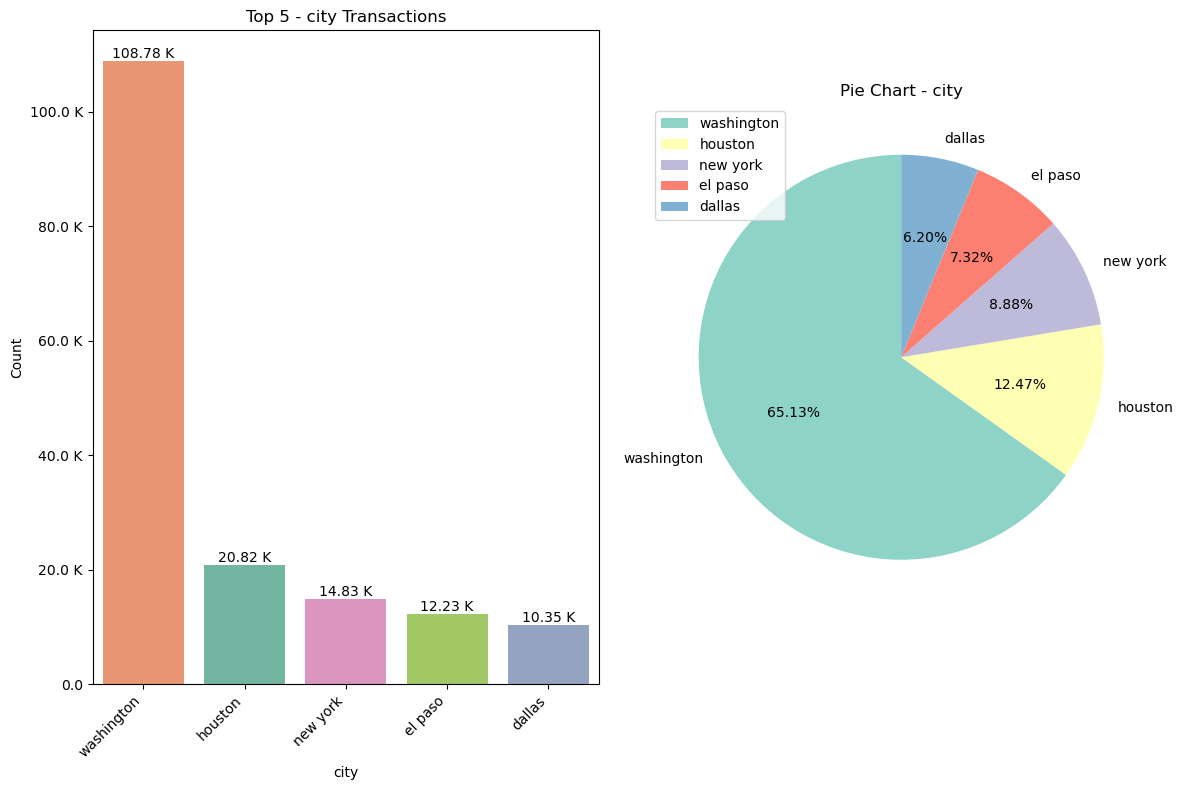

In [29]:
# Specific column
var = 'city'

# Mengambil 10 kategori teratas berdasarkan jumlah kemunculannya
top_categories = cc_df[var].value_counts().index[:5]

# Canvas
plt.figure(figsize = (12, 8))

# Count Plot dengan membatasi kategori yang ditampilkan
ax1 = plt.subplot(1, 2, 1)

# Filter data untuk menampilkan hanya kategori teratas atau "Others"
filtered_df = cc_df[cc_df[var].isin(top_categories)]

# Count Plot dengan filtered data
sns.countplot(x = var, data = filtered_df, ax = ax1, hue = var, palette = 'Set2', order = top_categories)

# Menambahkan judul dan label
ax1.set_title(f'Top 5 - {var} Transactions', fontsize = 12)
ax1.set_xlabel(var, fontsize = 10)
ax1.set_ylabel('Count', fontsize = 10)

# Menambahkan formatter untuk y-axis
ax1.yaxis.set_major_formatter(ticker.FuncFormatter(lab_round))

# Menambahkan teks pada setiap batang di countplot
for p in ax1.patches:
    height = p.get_height()
    if height > 0:  # Hanya tambahkan teks jika nilai lebih besar dari nol
        ax1.text(
            p.get_x() + p.get_width() / 2,
            height + 0.1,  # Menempatkan teks di atas batang
            f'{val_round(height)}',
            ha='center',
            va='bottom',
            fontsize=10
        )

# Menambahkan xticks
plt.xticks(rotation = 45, ha = 'right', fontsize = 10)

# Pie Chart dengan kategori teratas
ax2 = plt.subplot(1, 2, 2)
counts = cc_df[var].value_counts()

# Hanya menampilkan kategori teratas untuk pie chart
top_counts = counts.head(5)
ax2.pie(top_counts, labels = top_counts.index, autopct = '%0.2f%%', startangle = 90, colors = sns.color_palette("Set3", len(top_counts)))
ax2.set_title(f'Pie Chart - {var}', fontsize = 12)

# Adjust layout
plt.tight_layout()
plt.legend(loc = 'best')
plt.show()

#### Season

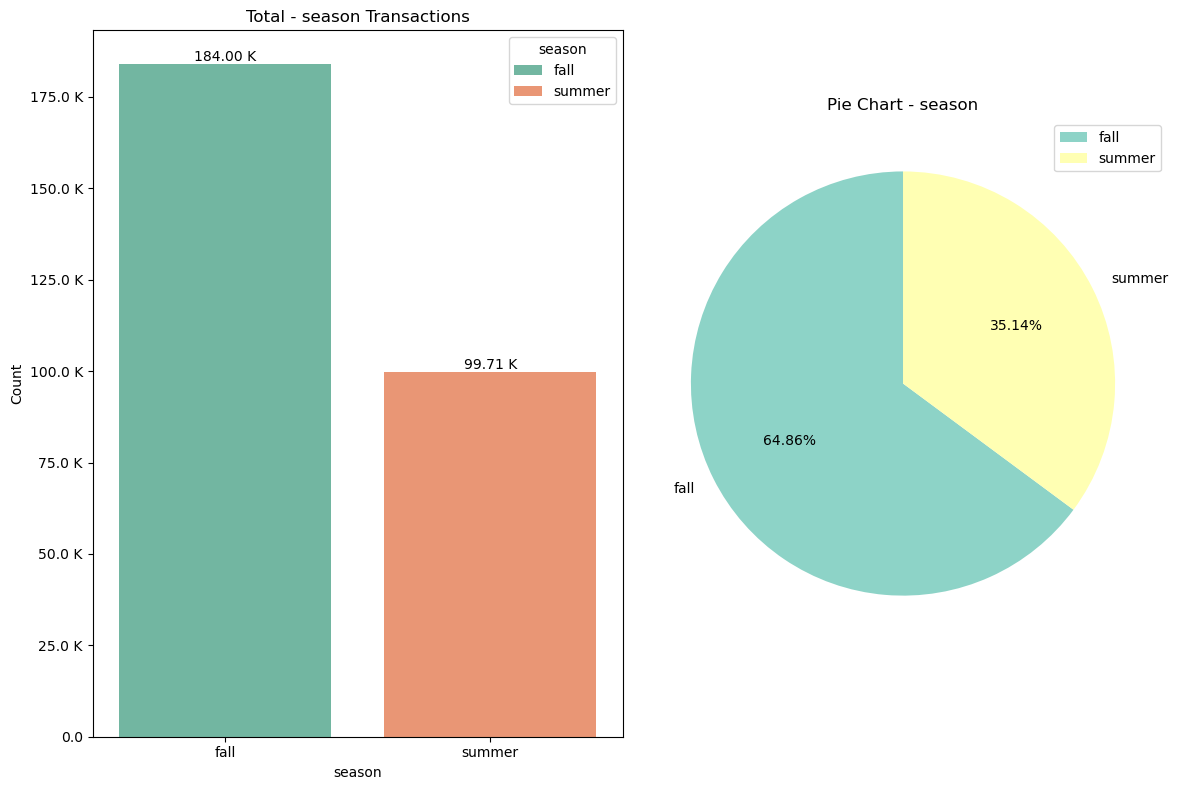

In [30]:
# specific column
var = 'season'

# canvas
plt.figure(figsize = (12, 8))

# Count Plot 
ax1 = plt.subplot(1, 2, 1)  
sns.countplot(x = var, data = cc_df, ax = ax1, hue = var, palette = 'Set2', legend = True, order = cc_df[var].value_counts().index)

# Menambahkan judul dan label
ax1.set_title(f'Total - {var} Transactions', fontsize = 12)
ax1.set_xlabel(var, fontsize = 10)  
ax1.set_ylabel('Count', fontsize = 10)  

# Menambahkan formatter untuk y-axis
ax1.yaxis.set_major_formatter(ticker.FuncFormatter(lab_round))

# Menambahkan text pada setiap batang di countplot
for p in ax1.patches:
    # ambil tinggi batang
    height = p.get_height()
    
    # hanya menambahkan teks jika tinggi batang lebih dari 0
    if height > 0:
        ax1.text(p.get_x() + p.get_width() / 2, height + 0.1,  # Menempatkan teks di atas batang
                 f'{val_round(height)}', ha = 'center', va = 'bottom', fontsize = 10)  # Teks di tengah atas batang


# Pie Chart
ax2 = plt.subplot(1, 2, 2)
counts = cc_df[var].value_counts()
ax2.pie(counts, labels = counts.index, autopct = '%0.2f%%', startangle = 90, colors = sns.color_palette("Set3", len(counts)))
ax2.set_title(f'Pie Chart - {var}', fontsize = 12)

# Adjust layout
plt.tight_layout()
plt.legend(loc = 'best')
plt.show()

#### Week Category

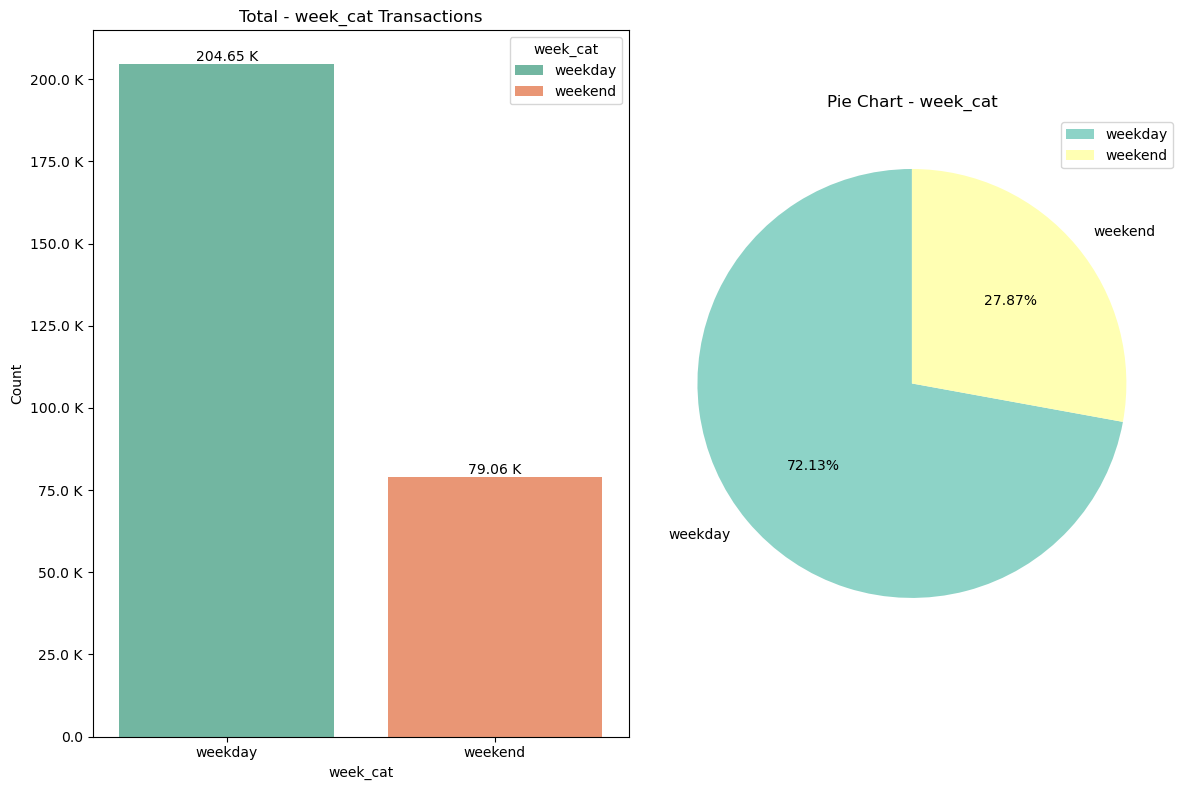

In [31]:
# specific column
var = 'week_cat'

# canvas
plt.figure(figsize = (12, 8))

# Count Plot 
ax1 = plt.subplot(1, 2, 1)  
sns.countplot(x = var, data = cc_df, ax = ax1, hue = var, palette = 'Set2', legend = True, order = cc_df[var].value_counts().index)

# Menambahkan judul dan label
ax1.set_title(f'Total - {var} Transactions', fontsize = 12)
ax1.set_xlabel(var, fontsize = 10)  
ax1.set_ylabel('Count', fontsize = 10)  

# Menambahkan formatter untuk y-axis
ax1.yaxis.set_major_formatter(ticker.FuncFormatter(lab_round))

# Menambahkan text pada setiap batang di countplot
for p in ax1.patches:
    # ambil tinggi batang
    height = p.get_height()
    
    # hanya menambahkan teks jika tinggi batang lebih dari 0
    if height > 0:
        ax1.text(p.get_x() + p.get_width() / 2, height + 0.1,  # Menempatkan teks di atas batang
                 f'{val_round(height)}', ha = 'center', va = 'bottom', fontsize = 10)  # Teks di tengah atas batang


# Pie Chart
ax2 = plt.subplot(1, 2, 2)
counts = cc_df[var].value_counts()
ax2.pie(counts, labels = counts.index, autopct = '%0.2f%%', startangle = 90, colors = sns.color_palette("Set3", len(counts)))
ax2.set_title(f'Pie Chart - {var}', fontsize = 12)

# Adjust layout
plt.tight_layout()
plt.legend(loc = 'best')
plt.show()

#### Day

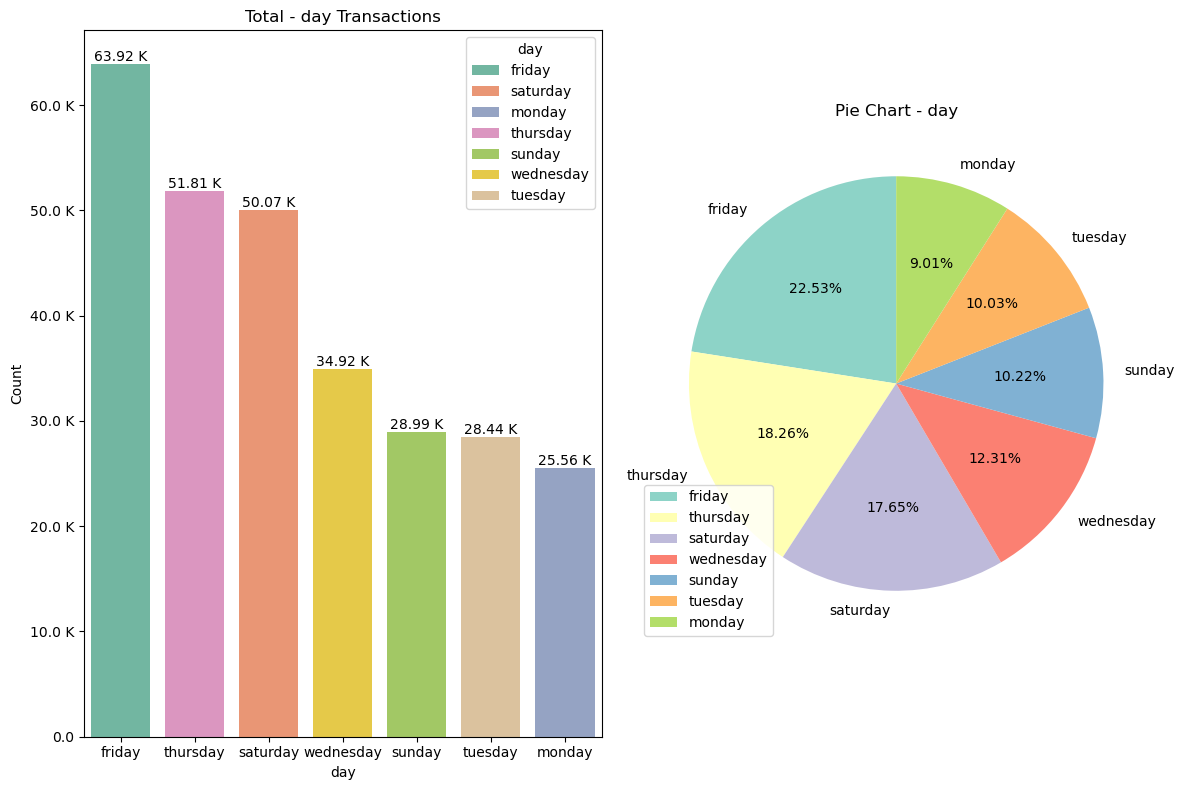

In [32]:
# specific column
var = 'day'

# canvas
plt.figure(figsize = (12, 8))

# Count Plot 
ax1 = plt.subplot(1, 2, 1)  
sns.countplot(x = var, data = cc_df, ax = ax1, hue = var, palette = 'Set2', legend = True, order = cc_df[var].value_counts().index)

# Menambahkan judul dan label
ax1.set_title(f'Total - {var} Transactions', fontsize = 12)
ax1.set_xlabel(var, fontsize = 10)  
ax1.set_ylabel('Count', fontsize = 10)  

# Menambahkan formatter untuk y-axis
ax1.yaxis.set_major_formatter(ticker.FuncFormatter(lab_round))

# Menambahkan text pada setiap batang di countplot
for p in ax1.patches:
    # ambil tinggi batang
    height = p.get_height()
    
    # hanya menambahkan teks jika tinggi batang lebih dari 0
    if height > 0:
        ax1.text(p.get_x() + p.get_width() / 2, height + 0.1,  # Menempatkan teks di atas batang
                 f'{val_round(height)}', ha = 'center', va = 'bottom', fontsize = 10)  # Teks di tengah atas batang


# Pie Chart
ax2 = plt.subplot(1, 2, 2)
counts = cc_df[var].value_counts()
ax2.pie(counts, labels = counts.index, autopct = '%0.2f%%', startangle = 90, colors = sns.color_palette("Set3", len(counts)))
ax2.set_title(f'Pie Chart - {var}', fontsize = 12)

# Adjust layout
plt.tight_layout()
plt.legend(loc = 'best')
plt.show()

#### Limit Category

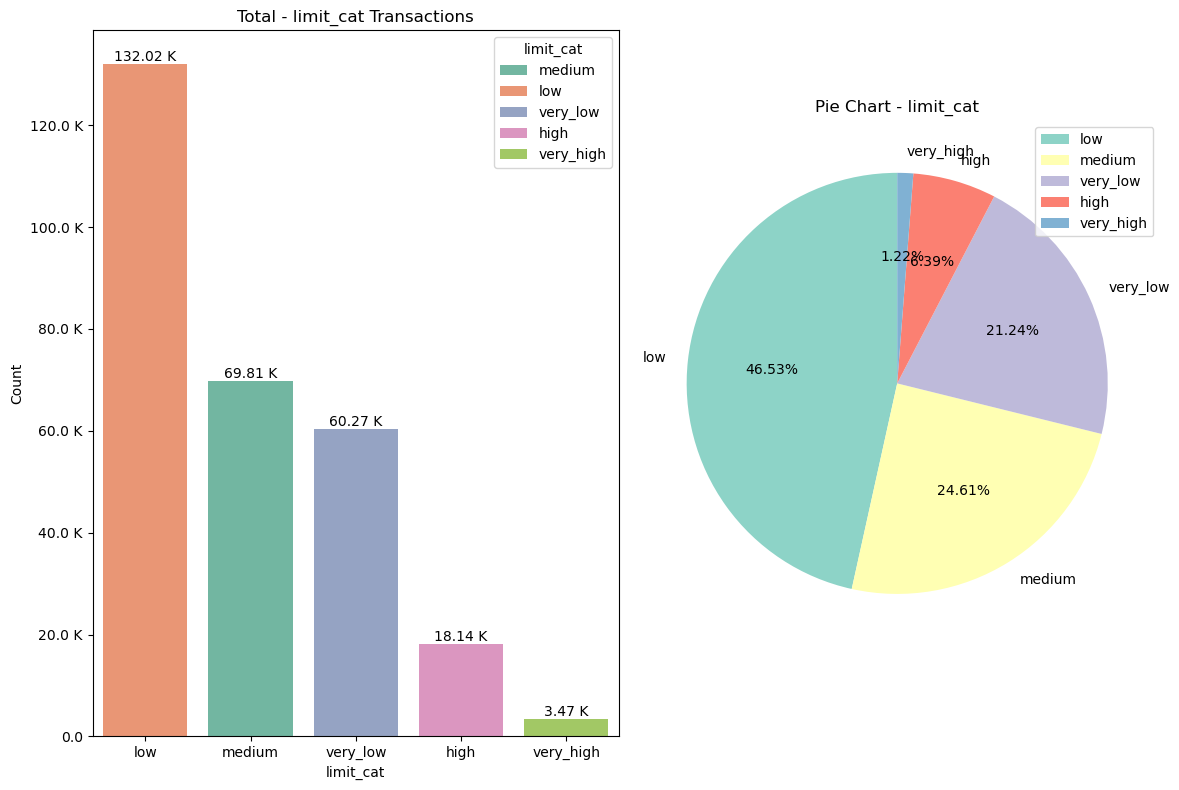

In [33]:
# specific column
var = 'limit_cat'

# canvas
plt.figure(figsize = (12, 8))

# Count Plot 
ax1 = plt.subplot(1, 2, 1)  
sns.countplot(x = var, data = cc_df, ax = ax1, hue = var, palette = 'Set2', legend = True, order = cc_df[var].value_counts().index)

# Menambahkan judul dan label
ax1.set_title(f'Total - {var} Transactions', fontsize = 12)
ax1.set_xlabel(var, fontsize = 10)  
ax1.set_ylabel('Count', fontsize = 10)  

# Menambahkan formatter untuk y-axis
ax1.yaxis.set_major_formatter(ticker.FuncFormatter(lab_round))

# Menambahkan text pada setiap batang di countplot
for p in ax1.patches:
    # ambil tinggi batang
    height = p.get_height()
    
    # hanya menambahkan teks jika tinggi batang lebih dari 0
    if height > 0:
        ax1.text(p.get_x() + p.get_width() / 2, height + 0.1,  # Menempatkan teks di atas batang
                 f'{val_round(height)}', ha = 'center', va = 'bottom', fontsize = 10)  # Teks di tengah atas batang


# Pie Chart
ax2 = plt.subplot(1, 2, 2)
counts = cc_df[var].value_counts()
ax2.pie(counts, labels = counts.index, autopct = '%0.2f%%', startangle = 90, colors = sns.color_palette("Set3", len(counts)))
ax2.set_title(f'Pie Chart - {var}', fontsize = 12)

# Adjust layout
plt.tight_layout()
plt.legend(loc = 'best')
plt.show()

#### Geo Category

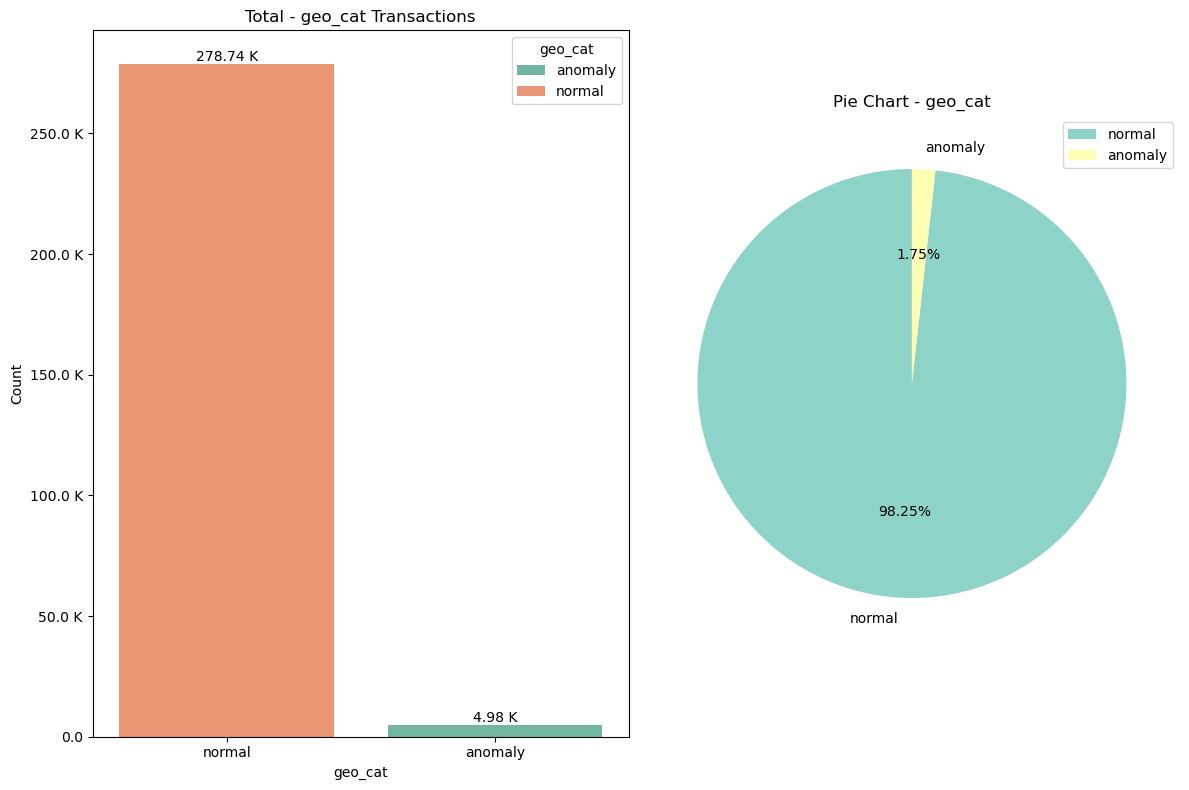

In [34]:
# specific column
var = 'geo_cat'

# canvas
plt.figure(figsize = (12, 8))

# Count Plot 
ax1 = plt.subplot(1, 2, 1)  
sns.countplot(x = var, data = cc_df, ax = ax1, hue = var, palette = 'Set2', legend = True, order = cc_df[var].value_counts().index)

# Menambahkan judul dan label
ax1.set_title(f'Total - {var} Transactions', fontsize = 12)
ax1.set_xlabel(var, fontsize = 10)  
ax1.set_ylabel('Count', fontsize = 10)  

# Menambahkan formatter untuk y-axis
ax1.yaxis.set_major_formatter(ticker.FuncFormatter(lab_round))

# Menambahkan text pada setiap batang di countplot
for p in ax1.patches:
    # ambil tinggi batang
    height = p.get_height()
    
    # hanya menambahkan teks jika tinggi batang lebih dari 0
    if height > 0:
        ax1.text(p.get_x() + p.get_width() / 2, height + 0.1,  # Menempatkan teks di atas batang
                 f'{val_round(height)}', ha = 'center', va = 'bottom', fontsize = 10)  # Teks di tengah atas batang


# Pie Chart
ax2 = plt.subplot(1, 2, 2)
counts = cc_df[var].value_counts()
ax2.pie(counts, labels = counts.index, autopct = '%0.2f%%', startangle = 90, colors = sns.color_palette("Set3", len(counts)))
ax2.set_title(f'Pie Chart - {var}', fontsize = 12)

# Adjust layout
plt.tight_layout()
plt.legend(loc = 'best')
plt.show()

#### Fraud Status

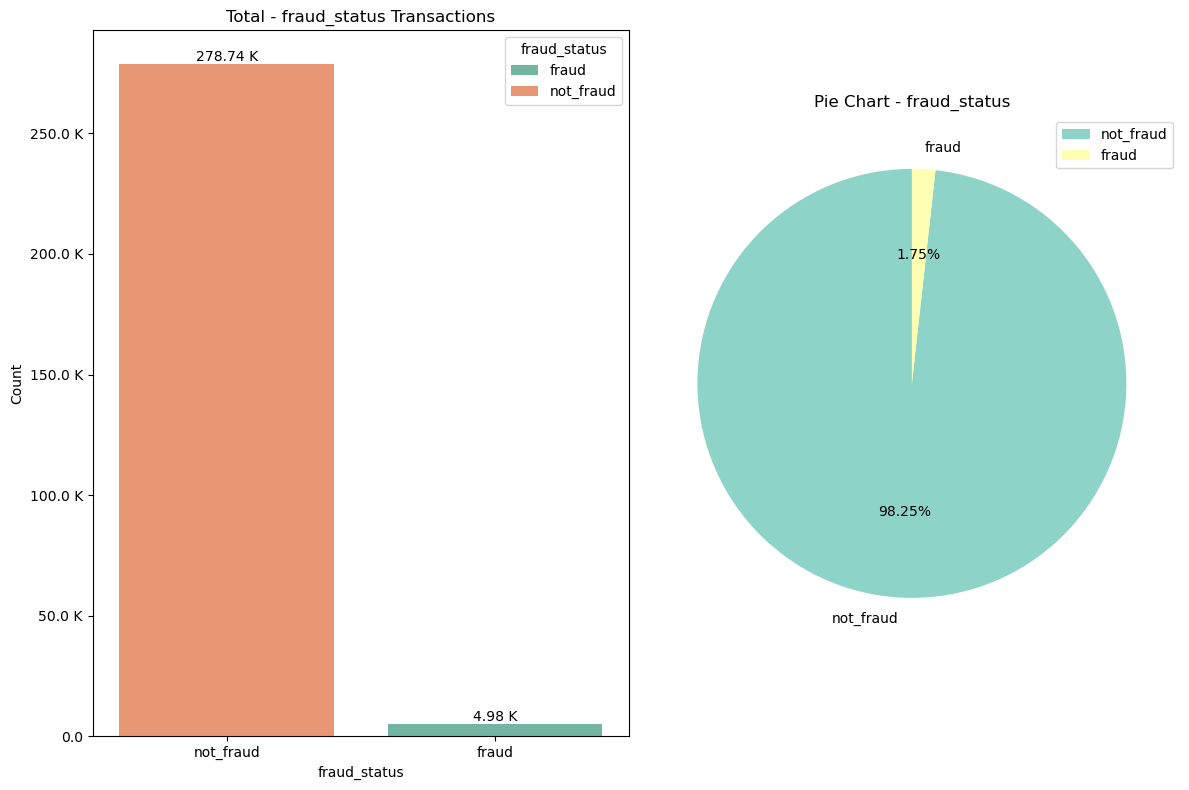

In [35]:
# specific column
var = 'fraud_status'

# canvas
plt.figure(figsize = (12, 8))

# Count Plot 
ax1 = plt.subplot(1, 2, 1)  
sns.countplot(x = var, data = cc_df, ax = ax1, hue = var, palette = 'Set2', legend = True, order = cc_df[var].value_counts().index)

# Menambahkan judul dan label
ax1.set_title(f'Total - {var} Transactions', fontsize = 12)
ax1.set_xlabel(var, fontsize = 10)  
ax1.set_ylabel('Count', fontsize = 10)  

# Menambahkan formatter untuk y-axis
ax1.yaxis.set_major_formatter(ticker.FuncFormatter(lab_round))

# Menambahkan text pada setiap batang di countplot
for p in ax1.patches:
    # ambil tinggi batang
    height = p.get_height()
    
    # hanya menambahkan teks jika tinggi batang lebih dari 0
    if height > 0:
        ax1.text(p.get_x() + p.get_width() / 2, height + 0.1,  # Menempatkan teks di atas batang
                 f'{val_round(height)}', ha = 'center', va = 'bottom', fontsize = 10)  # Teks di tengah atas batang


# Pie Chart
ax2 = plt.subplot(1, 2, 2)
counts = cc_df[var].value_counts()
ax2.pie(counts, labels = counts.index, autopct = '%0.2f%%', startangle = 90, colors = sns.color_palette("Set3", len(counts)))
ax2.set_title(f'Pie Chart - {var}', fontsize = 12)

# Adjust layout
plt.tight_layout()
plt.legend(loc = 'best')
plt.show()

### Bi-variate Analyst

In [36]:
# 
bi_df = cat_df.copy()
bi_df = bi_df.drop(labels = ['quarter', 'month'], axis = 1)
bi_df.head()

,state,city,season,week_cat,day,limit_cat,geo_cat,fraud_status
0,pa,houston,fall,weekday,friday,medium,anomaly,fraud
1,pa,houston,fall,weekend,saturday,medium,normal,not_fraud
2,pa,houston,fall,weekday,monday,medium,normal,not_fraud
3,pa,houston,fall,weekday,thursday,medium,normal,not_fraud
4,pa,houston,fall,weekday,monday,medium,normal,not_fraud


In [37]:
from itertools import combinations

# Mencari pasangan kolom yang akan diuji
categorical_columns = bi_df.columns
column_pairs = list(combinations(categorical_columns, 2))  # Membuat pasangan kolom

# Menyimpan pasangan dengan hubungan signifikan
significant_pairs = []

# Melakukan uji Chi-Square untuk setiap pasangan kolom
alpha = 0.05  # Threshold signifikansi

for col1, col2 in column_pairs:
    contingency_table = pd.crosstab(bi_df[col1], bi_df[col2])  # Membuat tabel kontingensi
    chi2, p, dof, expected = stats.chi2_contingency(contingency_table)  # Uji Chi-Square
    
    print(f"Chi-Square Test antara {col1} dan {col2}:")
    print('=' * 50)

    print(f"\t Statistik Chi-Square: {chi2:.4f}")
    print(f"\t p-value: {p:.4f} \n")
    # print(f"\t Degrees of Freedom: {dof} \n")

    # Cek apakah hubungan signifikan
    if p < alpha:
        print(f"Test antara {col1} dan {col2} → TERDAPAT hubungan signifikan antara variabel \n")
        significant_pairs.append((col1, col2, p))  # Simpan pasangan signifikan

    else:
        print(f"Test antara {col1} dan {col2} → TIDAK ADA hubungan signifikan \n")

    print('=' * 50)

Chi-Square Test antara state dan city:
	 Statistik Chi-Square: 9646208.0000
	 p-value: 0.0000 

Test antara state dan city → TERDAPAT hubungan signifikan antara variabel 

Chi-Square Test antara state dan season:
	 Statistik Chi-Square: 32.2944
	 p-value: 0.5514 

Test antara state dan season → TIDAK ADA hubungan signifikan 

Chi-Square Test antara state dan week_cat:
	 Statistik Chi-Square: 29.2058
	 p-value: 0.7017 

Test antara state dan week_cat → TIDAK ADA hubungan signifikan 

Chi-Square Test antara state dan day:
	 Statistik Chi-Square: 214.2021
	 p-value: 0.2981 

Test antara state dan day → TIDAK ADA hubungan signifikan 

Chi-Square Test antara state dan limit_cat:
	 Statistik Chi-Square: 61745.4086
	 p-value: 0.0000 

Test antara state dan limit_cat → TERDAPAT hubungan signifikan antara variabel 

Chi-Square Test antara state dan geo_cat:
	 Statistik Chi-Square: 37.6356
	 p-value: 0.3063 

Test antara state dan geo_cat → TIDAK ADA hubungan signifikan 

Chi-Square Test antara 

In [38]:
# Menampilkan daftar pasangan dengan hubungan signifikan
if significant_pairs:
    print("\nPasangan variabel dengan hubungan signifikan (p < 0.05):")

    for col1, col2, p in significant_pairs:
        print(f"👉 {col1} ↔ {col2} (p-value: {p:.4f})")

else:
    print("\nTidak ada pasangan variabel yang memiliki hubungan signifikan (p ≥ 0.05).")


Pasangan variabel dengan hubungan signifikan (p < 0.05):
👉 state ↔ city (p-value: 0.0000)
👉 state ↔ limit_cat (p-value: 0.0000)
👉 city ↔ limit_cat (p-value: 0.0000)
👉 city ↔ geo_cat (p-value: 0.0006)
👉 city ↔ fraud_status (p-value: 0.0006)
👉 season ↔ week_cat (p-value: 0.0000)
👉 season ↔ day (p-value: 0.0000)
👉 season ↔ geo_cat (p-value: 0.0000)
👉 season ↔ fraud_status (p-value: 0.0000)
👉 week_cat ↔ day (p-value: 0.0000)
👉 day ↔ geo_cat (p-value: 0.0393)
👉 day ↔ fraud_status (p-value: 0.0393)
👉 limit_cat ↔ geo_cat (p-value: 0.0000)
👉 limit_cat ↔ fraud_status (p-value: 0.0000)
👉 geo_cat ↔ fraud_status (p-value: 0.0000)


In [39]:
def cramers_v(chi2, n, dof):
    return np.sqrt(chi2 / (n * dof))

selected_vars = set()

for col1, col2, p in significant_pairs:
    contingency_table = pd.crosstab(bi_df[col1], bi_df[col2])
    chi2, _, dof, _ = stats.chi2_contingency(contingency_table)
    n = bi_df.shape[0]
    
    cramer_v_value = cramers_v(chi2, n, dof)
    print(f"Cramér’s V untuk {col1} ↔ {col2}: {cramer_v_value:.4f}")

    if cramer_v_value > 0.3:  # Hanya memilih hubungan kuat (> 0.3)
        selected_vars.add(col1)
        selected_vars.add(col2)

Cramér’s V untuk state ↔ city: 0.0905
Cramér’s V untuk state ↔ limit_cat: 0.0400
Cramér’s V untuk city ↔ limit_cat: 0.0390
Cramér’s V untuk city ↔ geo_cat: 0.0023
Cramér’s V untuk city ↔ fraud_status: 0.0023
Cramér’s V untuk season ↔ week_cat: 0.0422
Cramér’s V untuk season ↔ day: 0.0307
Cramér’s V untuk season ↔ geo_cat: 0.0507
Cramér’s V untuk season ↔ fraud_status: 0.0507
Cramér’s V untuk week_cat ↔ day: 0.4082
Cramér’s V untuk day ↔ geo_cat: 0.0028
Cramér’s V untuk day ↔ fraud_status: 0.0028
Cramér’s V untuk limit_cat ↔ geo_cat: 0.0050
Cramér’s V untuk limit_cat ↔ fraud_status: 0.0050
Cramér’s V untuk geo_cat ↔ fraud_status: 0.9999


In [40]:
print("✅ Kategori variabel yang dipilih untuk analisis selanjutnya:", selected_vars)

✅ Kategori variabel yang dipilih untuk analisis selanjutnya: {'fraud_status', 'geo_cat', 'day', 'week_cat'}


In [41]:
# check
cc_df.select_dtypes(include = 'number').columns

Index(['credit_card', 'long', 'lat', 'zipcode', 'year', 'credit_card_limit',
       'transaction_dollar_amount', 'transaction_count',
       'time_diff_per_seconds', 'prev_long', 'prev_lat', 'distance'],
      dtype='object')

#### Fraud Status

In [42]:
monthly_fraud = cc_df.groupby(['month', 'fraud_status'], observed = False).agg({'credit_card': 'count'}).rename(columns = {'credit_card': 'total'})
monthly_fraud = pd.DataFrame(monthly_fraud)
monthly_fraud = monthly_fraud.reset_index()
monthly_fraud

,month,fraud_status,total
0,august,fraud,2525
1,august,not_fraud,92959
2,july,fraud,126
3,july,not_fraud,4098
4,october,fraud,744
5,october,not_fraud,90709
6,september,fraud,1581
7,september,not_fraud,90970


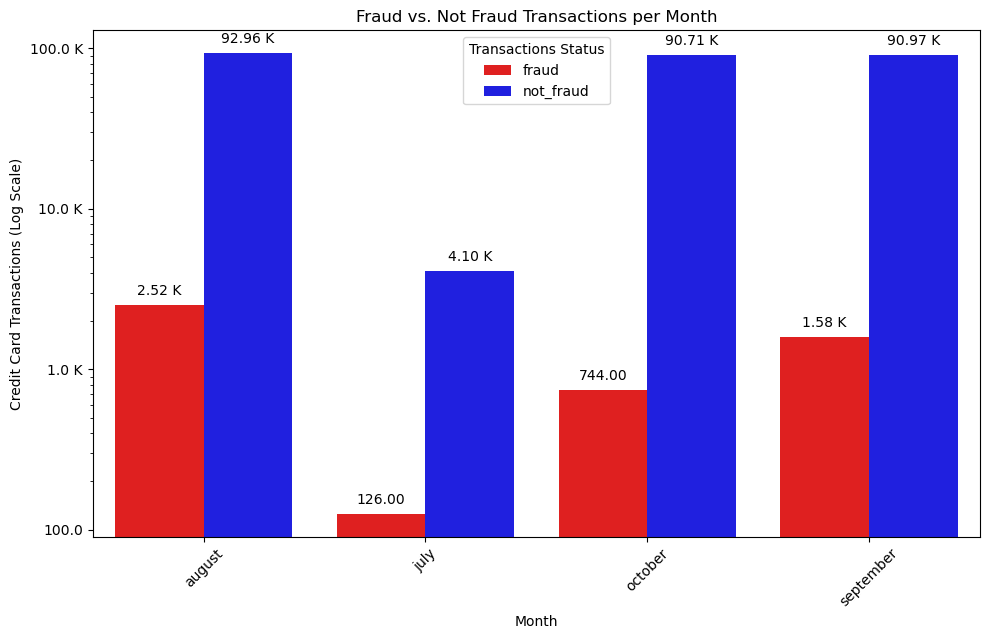

In [43]:
# Plot dengan skala logaritmik
plt.figure(figsize = (10, 6))
ax = sns.barplot(data = monthly_fraud, x = "month", y = "total", hue = "fraud_status", palette = ["red", "blue"])

# Menampilkan nilai di atas batang dengan format singkat
for p in ax.patches:
    height = p.get_height()
    ax.annotate(val_round(height), 
                (p.get_x() + p.get_width() / 2., height), 
                ha = 'center', va = 'bottom', fontsize = 10, color = 'black', xytext = (0, 5),
                textcoords = 'offset points')

# Mengatur skala logaritmik agar data lebih proporsional
ax.set_yscale("log")

# Mengatur format label sumbu y
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lab_round))

# Labels dan title
plt.title("Fraud vs. Not Fraud Transactions per Month")
plt.xlabel("Month")
plt.ylabel("Credit Card Transactions (Log Scale)")

plt.legend(title = "Transactions Status", loc = 'best')
plt.tight_layout()
plt.xticks(rotation = 45)

plt.show()


#### Fraud Transactions

In [44]:
transactions_fraud = cc_df.groupby(['month', 'fraud_status'], observed = False).agg({'transaction_dollar_amount': 'sum'}).rename(columns = {'transaction_dollar_amount': 'total'})
transactions_fraud = pd.DataFrame(transactions_fraud).reset_index()
transactions_fraud = transactions_fraud[transactions_fraud['fraud_status'] == 'fraud'].drop(columns = 'fraud_status').reset_index(drop = True)

transactions_fraud

,month,total
0,august,177571.20
1,july,8570.99
2,october,51698.51
3,september,110613.32


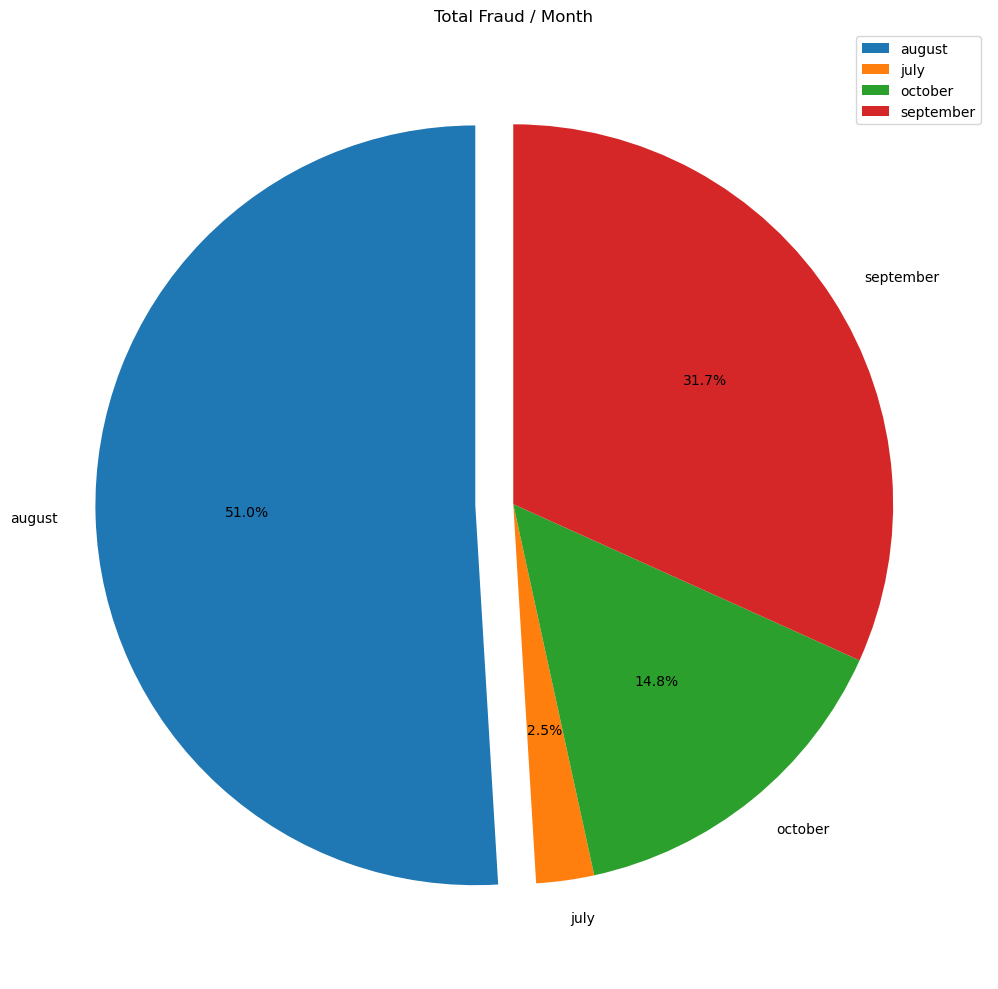

In [45]:
# Membuat Pie Chart
plt.figure(figsize = (12, 10))  # Ukuran plot

max_index = transactions_fraud["total"].idxmax()  # Find the index of the highest value
explode = [0.1 if idx == max_index else 0 for idx in range(len(transactions_fraud))]  # Explode the highest slice

plt.pie(transactions_fraud["total"], 
        labels = transactions_fraud["month"], 
        autopct = '%1.1f%%', 
        startangle = 90, 
        explode = explode)

# Tambahkan Judul
plt.title("Total Fraud / Month")

# Tampilkan Plot
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

#### Top Fraud City

In [46]:
city_fraud = cc_df.groupby(['city', 'fraud_status'], observed = False).agg({'credit_card': 'count'}).rename(columns = {'credit_card': 'total'})
city_fraud = pd.DataFrame(city_fraud).reset_index()
city_fraud = city_fraud[city_fraud['fraud_status'] == 'fraud'].drop(columns = 'fraud_status').sort_values(by = 'total', ascending = False).reset_index(drop = True)
city_fraud = city_fraud.head()

city_fraud

,city,total
0,washington,1885
1,houston,380
2,new york,252
3,el paso,211
4,dallas,191


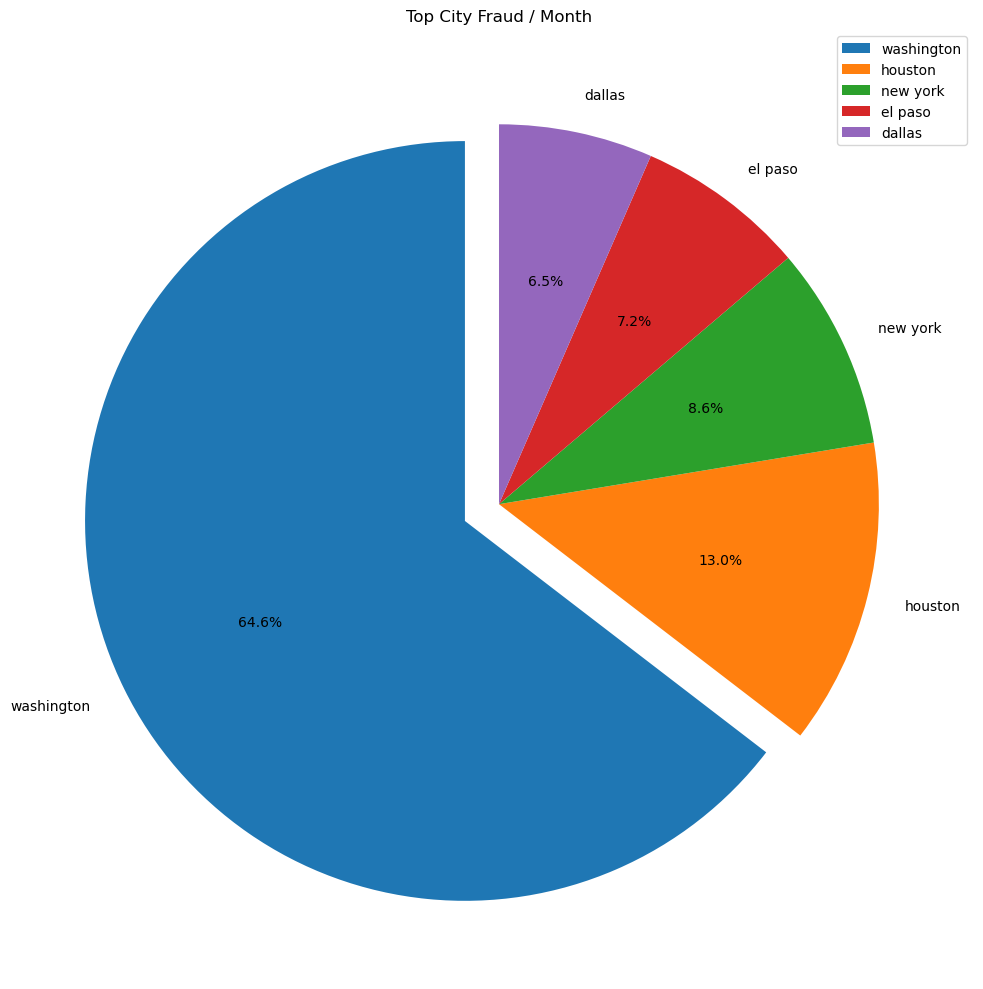

In [47]:
# Membuat Pie Chart
plt.figure(figsize = (12, 10))  # Ukuran plot

max_index = city_fraud["total"].idxmax()  # Find the index of the highest value
explode = [0.1 if idx == max_index else 0 for idx in range(len(city_fraud))]  # Explode the highest slice

plt.pie(city_fraud["total"], 
        labels = city_fraud["city"], 
        autopct = '%1.1f%%', 
        startangle = 90, 
        explode = explode)

# Tambahkan Judul
plt.title("Top City Fraud / Month")

# Tampilkan Plot
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

# Write Data

In [48]:
# 
pickle_data = cc_df.copy()
pickle_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 283712 entries, 0 to 294587
Data columns (total 23 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   credit_card                283712 non-null  int64         
 1   datetime                   283712 non-null  datetime64[ns]
 2   long                       283712 non-null  float64       
 3   lat                        283712 non-null  float64       
 4   zipcode                    283712 non-null  int64         
 5   state                      283712 non-null  object        
 6   city                       283712 non-null  object        
 7   year                       283712 non-null  int32         
 8   quarter                    283712 non-null  object        
 9   month                      283712 non-null  object        
 10  season                     283712 non-null  object        
 11  week_cat                   283712 non-null  object       

In [49]:
pickle_data.head()

,credit_card,datetime,long,lat,zipcode,state,city,year,quarter,month,season,week_cat,day,credit_card_limit,limit_cat,transaction_dollar_amount,transaction_count,time_diff_per_seconds,prev_long,prev_lat,distance,geo_cat,fraud_status
0,1003715054175576,2015-09-11 00:32:40,-80.174132,40.267370,15342,pa,houston,2015,2015Q3,september,fall,weekday,friday,20000,medium,43.78,1.0,0.0,0.000000,0.000000,9177.582847,anomaly,fraud
1,1003715054175576,2015-10-24 22:23:08,-80.194240,40.180114,15342,pa,houston,2015,2015Q4,october,fall,weekend,saturday,20000,medium,103.15,1.0,3793828.0,-80.174132,40.267370,9.838861,normal,not_fraud
2,1003715054175576,2015-10-26 18:19:36,-80.211033,40.313004,15342,pa,houston,2015,2015Q4,october,fall,weekday,monday,20000,medium,48.55,1.0,158188.0,-80.194240,40.180114,14.825103,normal,not_fraud
3,1003715054175576,2015-10-22 19:41:10,-80.174138,40.290895,15342,pa,houston,2015,2015Q4,october,fall,weekday,thursday,20000,medium,136.18,1.0,-340706.0,-80.211033,40.313004,3.983158,normal,not_fraud
4,1003715054175576,2015-10-26 20:08:22,-80.238720,40.166719,15342,pa,houston,2015,2015Q4,october,fall,weekday,monday,20000,medium,71.82,1.0,347232.0,-80.174138,40.290895,14.843545,normal,not_fraud


#### Hashing Data

In [50]:
# Add key column
pickle_data['cc_id'] = pickle_data.index.astype(str) + '-' + np.random.random(len(pickle_data)).astype(str)
pickle_data['trx_id'] = pickle_data.index.astype(str) + '-' + np.random.random(len(pickle_data)).astype(str)

# check specific duplicate
print(f"Total Specific Duplicate: {pickle_data['credit_card'].duplicated().sum()}")
print(f"Total Specific Duplicate: {pickle_data['trx_id'].duplicated().sum()}")

Total Specific Duplicate: 282752
Total Specific Duplicate: 0


In [51]:
# Fungsi untuk melakukan hashing dengan penanganan NaN
def hash_with_sha256(value):
    if pd.isna(value):  
        return None  
    
    return hashlib.sha256(value.encode()).hexdigest()

# Terapkan fungsi hashing ke kolom yang diinginkan
pickle_data['cc_id'] = pickle_data['cc_id'].apply(hash_with_sha256)
pickle_data['trx_id'] = pickle_data['trx_id'].apply(hash_with_sha256)

pickle_data.head()

,credit_card,datetime,long,lat,zipcode,state,city,year,quarter,month,season,week_cat,day,credit_card_limit,limit_cat,transaction_dollar_amount,transaction_count,time_diff_per_seconds,prev_long,prev_lat,distance,geo_cat,fraud_status,cc_id,trx_id
0,1003715054175576,2015-09-11 00:32:40,-80.174132,40.267370,15342,pa,houston,2015,2015Q3,september,fall,weekday,friday,20000,medium,43.78,1.0,0.0,0.000000,0.000000,9177.582847,anomaly,fraud,794b5c2990f524f661a29dac17283f0badfa4bbedbe041...,6183942279bfbb07cdb4e0cb8891849812da5d97486631...
1,1003715054175576,2015-10-24 22:23:08,-80.194240,40.180114,15342,pa,houston,2015,2015Q4,october,fall,weekend,saturday,20000,medium,103.15,1.0,3793828.0,-80.174132,40.267370,9.838861,normal,not_fraud,b172bf8cd454807f7d56c66fcb12c5d988a6b158705c0e...,a9768c03147ed8a83d6d0394e80db6241211da4d5040a2...
2,1003715054175576,2015-10-26 18:19:36,-80.211033,40.313004,15342,pa,houston,2015,2015Q4,october,fall,weekday,monday,20000,medium,48.55,1.0,158188.0,-80.194240,40.180114,14.825103,normal,not_fraud,2b79d5a08aa17bdb0cc9c29b9fb1956cce0df0e18e68a4...,8c45c744f0b87a3b413b56d7122bfca03047d2f65643eb...
3,1003715054175576,2015-10-22 19:41:10,-80.174138,40.290895,15342,pa,houston,2015,2015Q4,october,fall,weekday,thursday,20000,medium,136.18,1.0,-340706.0,-80.211033,40.313004,3.983158,normal,not_fraud,f2b87bc62ea4c0cc9bc018d5de341a6364afd6d2f584c2...,acd607708a1cf71fd7cb38e84969bbacf64981b92ddc5d...
4,1003715054175576,2015-10-26 20:08:22,-80.238720,40.166719,15342,pa,houston,2015,2015Q4,october,fall,weekday,monday,20000,medium,71.82,1.0,347232.0,-80.174138,40.290895,14.843545,normal,not_fraud,8fc531ee523b42e7d87c9036ef1fc0a0dff47c44fdb942...,c7ba2900605cb66acd9749a7b91277901edfef162fb436...


In [52]:
# Check Duplicate
print(f'Total CC Id Duplicate: {pickle_data["cc_id"].duplicated().sum()}')
print(f'Total Transactions Id Duplicate: {pickle_data["trx_id"].duplicated().sum()}\n')

# Check unique table
print(f'Is CC Id unique: {pickle_data["cc_id"].is_unique}')
print(f'Is Transactions Id unique: {pickle_data["trx_id"].is_unique}')

Total CC Id Duplicate: 0
Total Transactions Id Duplicate: 0

Is CC Id unique: True
Is Transactions Id unique: True


In [53]:
pickle_data = pickle_data.sort_values(by = 'datetime', ascending = True).reset_index(drop = True)
pickle_data.head()

,credit_card,datetime,long,lat,zipcode,state,city,year,quarter,month,season,week_cat,day,credit_card_limit,limit_cat,transaction_dollar_amount,transaction_count,time_diff_per_seconds,prev_long,prev_lat,distance,geo_cat,fraud_status,cc_id,trx_id
0,9484591448272784,2015-07-31 09:39:48,-90.045639,29.889039,70112,la,new orleans,2015,2015Q3,july,summer,weekday,friday,4000,very_low,17.99,1.0,-7642455.0,-90.151504,29.945202,11.969568,normal,not_fraud,ac1e34e60d6ad33e82c597a0f269fe2b5e83428562d3aa...,0bc4a969dccbe3b475e9e374e53e9e3fce6dbf1e7da2fe...
1,7053196367895112,2015-07-31 11:03:48,-74.027561,40.689615,10001,ny,new york,2015,2015Q3,july,summer,weekday,friday,18000,low,12.09,1.0,-2527299.0,-73.927029,40.806511,15.511210,normal,not_fraud,1c266eb56e8271b57de874865469dc04abb5110ef52821...,03ba63876abb11634b3f875ddad559ee63940573628739...
2,9528285469413252,2015-07-31 11:10:14,-72.139485,43.108100,3280,nh,washington,2015,2015Q3,july,summer,weekday,friday,40000,very_high,78.21,1.0,-6508550.0,-72.064113,43.172281,9.404226,normal,not_fraud,6733096fda61cddbcb8e2cd74676332d87594d058be167...,b86ab6aa560ba291acec2dd27b90f810165ff9023aab47...
3,1845720274833905,2015-07-31 11:28:55,-89.002148,40.804323,61738,il,el paso,2015,2015Q3,july,summer,weekday,friday,20000,medium,74.41,1.0,-2534699.0,-88.974492,40.720877,9.556419,normal,not_fraud,c046d480aab2d35f98751ac74f030eff8d3c74005ac01c...,7e58fe9a9c6d89388acbd39be811095b6f13614fb16b93...
4,7850942767136368,2015-07-31 11:38:51,-72.025675,43.210753,3280,nh,washington,2015,2015Q3,july,summer,weekday,friday,4000,very_low,54.89,1.0,-1785659.0,-72.125392,43.219223,8.157130,normal,not_fraud,c59721adc2284ba7805c637ce4b1d25046d366d12833c0...,595746461886416a18a9ab75bde2742d402301a27b8f28...


In [54]:
# Tentukan folder tujuan
dir_name = 'datamart'
folder_path = f"../{dir_name}"

# Cek apakah folder sudah ada, jika belum buat foldernya
if not os.path.exists(folder_path):
    os.makedirs(folder_path)
    
    print(f"Directory '{dir_name}' created successfully.")

else: 
    print(f'Directory has already been created.')

Directory has already been created.


In [55]:
# calculate dataframe size
total_size_bytes = sys.getsizeof(pickle_data)

# Converse bytes to MB
total_size_mb = total_size_bytes / 1048576
print(f"Total size of DataFrame: {total_size_mb:.2f} MB")

Total size of DataFrame: 237.80 MB


In [56]:
# save pickle
with open(share['CLEAN_DATA'], 'wb') as f:
    pickle.dump(pickle_data, f)

## Data Mart

In [57]:
csv_data = pickle_data.copy()
csv_data.columns

Index(['credit_card', 'datetime', 'long', 'lat', 'zipcode', 'state', 'city',
       'year', 'quarter', 'month', 'season', 'week_cat', 'day',
       'credit_card_limit', 'limit_cat', 'transaction_dollar_amount',
       'transaction_count', 'time_diff_per_seconds', 'prev_long', 'prev_lat',
       'distance', 'geo_cat', 'fraud_status', 'cc_id', 'trx_id'],
      dtype='object')

### cc_info

In [58]:
cc_info_list = ['cc_id', 'credit_card', 'state', 'city', 'zipcode', 
                'year', 'quarter', 'month', 'season', 'week_cat', 'day',
                'credit_card_limit', 'limit_cat']

cc_info_dm = csv_data[cc_info_list]
cc_info_dm.head()

,cc_id,credit_card,state,city,zipcode,year,quarter,month,season,week_cat,day,credit_card_limit,limit_cat
0,ac1e34e60d6ad33e82c597a0f269fe2b5e83428562d3aa...,9484591448272784,la,new orleans,70112,2015,2015Q3,july,summer,weekday,friday,4000,very_low
1,1c266eb56e8271b57de874865469dc04abb5110ef52821...,7053196367895112,ny,new york,10001,2015,2015Q3,july,summer,weekday,friday,18000,low
2,6733096fda61cddbcb8e2cd74676332d87594d058be167...,9528285469413252,nh,washington,3280,2015,2015Q3,july,summer,weekday,friday,40000,very_high
3,c046d480aab2d35f98751ac74f030eff8d3c74005ac01c...,1845720274833905,il,el paso,61738,2015,2015Q3,july,summer,weekday,friday,20000,medium
4,c59721adc2284ba7805c637ce4b1d25046d366d12833c0...,7850942767136368,nh,washington,3280,2015,2015Q3,july,summer,weekday,friday,4000,very_low


In [59]:
# Tentukan folder tujuan
dir_name = 'datamart'
folder_path = f"../{dir_name}"

# Cek apakah folder sudah ada, jika belum buat foldernya
if not os.path.exists(folder_path):
    os.makedirs(folder_path)
    
    print(f"Directory '{dir_name}' created successfully.")

else: 
    print(f'Directory has already been created.')

Directory has already been created.


In [60]:
# calculate dataframe size
total_size_bytes = sys.getsizeof(cc_info_dm)

# Converse bytes to MB
total_size_mb = total_size_bytes / 1048576
print(f"Total size of DataFrame: {total_size_mb:.2f} MB")

Total size of DataFrame: 157.18 MB


In [61]:
# parameter
share = {**dotenv_values('../.env.shared')} 

cc_info_write = share['CC_INFO'] 

# save to csv
cc_info_dm.to_csv(cc_info_write, index = False, sep = ';')
print('Data has been saved')

Data has been saved


### cc_transactions

In [62]:
cc_transactions_list = ['cc_id', 'trx_id', 'datetime', 'transaction_dollar_amount', 'transaction_count', 
                        'time_diff_per_seconds', 'long', 'prev_long', 'lat', 'prev_lat', 
                        'distance', 'geo_cat', 'fraud_status']

cc_transactions_dm = csv_data[cc_transactions_list]
cc_transactions_dm.head()

,cc_id,trx_id,datetime,transaction_dollar_amount,transaction_count,time_diff_per_seconds,long,prev_long,lat,prev_lat,distance,geo_cat,fraud_status
0,ac1e34e60d6ad33e82c597a0f269fe2b5e83428562d3aa...,0bc4a969dccbe3b475e9e374e53e9e3fce6dbf1e7da2fe...,2015-07-31 09:39:48,17.99,1.0,-7642455.0,-90.045639,-90.151504,29.889039,29.945202,11.969568,normal,not_fraud
1,1c266eb56e8271b57de874865469dc04abb5110ef52821...,03ba63876abb11634b3f875ddad559ee63940573628739...,2015-07-31 11:03:48,12.09,1.0,-2527299.0,-74.027561,-73.927029,40.689615,40.806511,15.511210,normal,not_fraud
2,6733096fda61cddbcb8e2cd74676332d87594d058be167...,b86ab6aa560ba291acec2dd27b90f810165ff9023aab47...,2015-07-31 11:10:14,78.21,1.0,-6508550.0,-72.139485,-72.064113,43.108100,43.172281,9.404226,normal,not_fraud
3,c046d480aab2d35f98751ac74f030eff8d3c74005ac01c...,7e58fe9a9c6d89388acbd39be811095b6f13614fb16b93...,2015-07-31 11:28:55,74.41,1.0,-2534699.0,-89.002148,-88.974492,40.804323,40.720877,9.556419,normal,not_fraud
4,c59721adc2284ba7805c637ce4b1d25046d366d12833c0...,595746461886416a18a9ab75bde2742d402301a27b8f28...,2015-07-31 11:38:51,54.89,1.0,-1785659.0,-72.025675,-72.125392,43.210753,43.219223,8.157130,normal,not_fraud


In [63]:
# Tentukan folder tujuan
dir_name = 'datamart'
folder_path = f"../{dir_name}"

# Cek apakah folder sudah ada, jika belum buat foldernya
if not os.path.exists(folder_path):
    os.makedirs(folder_path)
    
    print(f"Directory '{dir_name}' created successfully.")

else: 
    print(f'Directory has already been created.')

Directory has already been created.


In [64]:
# calculate dataframe size
total_size_bytes = sys.getsizeof(cc_transactions_dm)

# Converse bytes to MB
total_size_mb = total_size_bytes / 1048576
print(f"Total size of DataFrame: {total_size_mb:.2f} MB")

Total size of DataFrame: 111.19 MB


In [65]:
# parameter
share = {**dotenv_values('../.env.shared')} 

cc_transactions_write = share['CC_TRANSACTIONS'] 

# save to csv
cc_transactions_dm.to_csv(cc_transactions_write, index = False, sep = ';')
print('Data has been saved')

Data has been saved


# Problem Statement

1. How to achieve efficiency and accuracy in detecting fraudulent transactions in order to reduce financial losses?